# Sentiment and Time Series Analysis of Luxury Beauty Products of Amazon

Importing All the Libraries Required


In [1]:
import json                                        # to work with json file
import pandas as pd                                # to work with dataframes
import numpy as np                                 # to work with numpy arrays
import gzip                                        # to extract work file from zip file
import nltk                                        # working with nlp algorithms
from nltk.sentiment import SentimentIntensityAnalyzer  # To predict the sentiments based on the text
from tqdm.notebook import tqdm                     # library for adding progress bar
import sklearn                                     # to working with machine learning algorithms
from sklearn.linear_model import LogisticRegression  # Classification algorithm
from sklearn.feature_extraction.text import TfidfVectorizer # To convert text to numerical based on tfidf score
from nltk.corpus import stopwords                  # to detect stopwords
import re                                          # To remove the unwanted text
from sklearn.metrics import classification_report  # Classification report
from sklearn.metrics import accuracy_score         # evaluation metric
from sklearn.metrics import f1_score               # evaluation metric
from sklearn.metrics import recall_score           # evaluation metric
from sklearn.metrics import precision_score        # evaluation metric
from sklearn.model_selection import train_test_split # train test split
import time                                        # to check the processing time
from sklearn.preprocessing import LabelEncoder     # To convert categorical to numerical
import warnings
warnings.filterwarnings('ignore')                  # To ignore the warnings
from sklearn.model_selection import StratifiedKFold # Splitting
from sklearn.naive_bayes import MultinomialNB       # Naive bayes algorithm
import matplotlib.pyplot as plt                     # Visualization tool
import seaborn as sns                               # Visualization tool
from statsmodels.tsa.seasonal import seasonal_decompose            # Time series components
from statsmodels.tsa.stattools import adfuller                      # To find the stationarity of the data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf       # To plot ACF and PACF plots
from statsmodels.tsa.arima.model import ARIMA                       # To build the ARIMA model
from sklearn.metrics import mean_squared_error                      # To check the mean square error                                      
from statsmodels.tsa.statespace.sarimax import SARIMAX              # To build the sarimax model
from sklearn.neighbors import NearestNeighbors                      # KNN algorithm
from sklearn.metrics.pairwise import cosine_similarity              # Asign correlation between the features
import scipy.sparse                                                 #
from scipy.sparse import csr_matrix                                 # Correlation Matrix
from scipy.sparse.linalg import svds                                #
from sklearn.preprocessing import MinMaxScaler, StandardScaler      # For Scaling the data                                 # For Cluster Formation  
from sklearn.feature_extraction.text import CountVectorizer         # For Vectorisation
from wordcloud import WordCloud, STOPWORDS                          # For Word Cloud
from sklearn import metrics                                         # For Matrics Algorithms
from sklearn.metrics import classification_report                   # For Classification Evaluation Report
from datetime import datetime, timedelta,date
from sklearn.metrics import confusion_matrix                        # It shows the tabel of probability values
from sklearn.metrics import mean_squared_error                      # To check the mean square error 

Parsing the JSON.GZ file to Python to get a Pandas Dataframe To Work On

In [2]:
def parse(path):                   # Creating Function
  g = gzip.open(path, 'rb')        # opens the compressed format file
  for l in g:
    yield eval(l)                  # Returns eval(l)

def getDF(path):                   # Creating Function getDF
  i = 0
  df = {}                          # Creating empty dictionary
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')         # .from_dict creates DataFrame object from dictionary by columns or by index allowing dtype specification.
false=False
true=True
#importing the metadata of software products
df = getDF('D:\Study\Minor Projects\Sales-Sentiment-Forcasting-Project\Dataset\meta_Luxury_Beauty.json.gz')
# importing the software reviews of metadata
df1 = getDF('D:\Study\Minor Projects\Sales-Sentiment-Forcasting-Project\Dataset\Luxury_Beauty_review.json.gz')


Checking the shape and starting entries of metadata

In [3]:
df.shape

(12299, 19)

In [4]:
df.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,[],,[After a long day of handling thorny situation...,,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,"[B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...",,,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,,$30.00,B00004U9V2,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
1,[],,[If you haven't experienced the pleasures of b...,,AHAVA Bath Salts,[],,,[],"1,633,549 in Beauty & Personal Care (",[],{' Product Dimensions: ': '3 x 3.5 x ...,Luxury Beauty,,,,B0000531EN,[],[]
2,[],,"[Rich, black mineral mud, harvested from the b...",,"AHAVA Dead Sea Mineral Mud, 8.5 oz, Pack of 4",[],,,[],"1,806,710 in Beauty &amp; Personal Care (",[],{' Product Dimensions: ': '5.1 x 3 x ...,Luxury Beauty,,,,B0000532JH,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,[],,[This liquid soap with convenient pump dispens...,,"Crabtree &amp; Evelyn Hand Soap, Gardeners, 10...",[],,,[],[],"[B00004U9V2, B00GHX7H0A, B00FRERO7G, B00R68QXC...",{' Product Dimensions: ': '2.6 x 2.6 ...,Luxury Beauty,,,$15.99,B00005A77F,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,[],,[Remember why you love your favorite blanket? ...,,Soy Milk Hand Crme,"[B000NZT6KM, B001BY229Q, B008J724QY, B0009YGKJ...",,,[],"42,464 in Beauty &amp; Personal Care (",[],{' Product Dimensions: ': '7.2 x 2.2 ...,Luxury Beauty,,,$18.00,B00005NDTD,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


Checking the shape and entries of Review Data

In [5]:
df1.shape

(574628, 12)

In [6]:
df1.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,2.0,3,True,"06 15, 2010",A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,1276560000,NaN,NaN
1,5.0,14,True,"01 7, 2010",A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.,1262822400,NaN,NaN
2,5.0,NaN,True,"04 18, 2018",A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars,1524009600,{'Size:': ' 3.5 oz.'},NaN
3,5.0,NaN,True,"04 18, 2018",A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on ...,Five Stars,1524009600,{'Size:': ' 3.5 oz.'},NaN
4,5.0,NaN,True,"04 17, 2018",A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals o...,I always have a backup ready.,1523923200,{'Size:': ' 3.5 oz.'},NaN


Making New Dataframe with the required features of the SOftware Metadata dataset

In [7]:
data2 = df[['asin', 'title', 'category', 'price', 'brand']]
data2.head()

,asin,title,category,price,brand
0,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,[],$30.00,
1,B0000531EN,AHAVA Bath Salts,[],,
2,B0000532JH,"AHAVA Dead Sea Mineral Mud, 8.5 oz, Pack of 4",[],,
3,B00005A77F,"Crabtree &amp; Evelyn Hand Soap, Gardeners, 10...",[],$15.99,
4,B00005NDTD,Soy Milk Hand Crme,[],$18.00,


Making a new dataframe with the required features from Software reviews dataset

In [8]:
data1 = df1[['asin', 'reviewText','reviewerName', 'overall', 'unixReviewTime', 'reviewTime']]

Merging the two dataframes with the product id

In [9]:
H_data = pd.merge(data1, data2, on = 'asin')
H_data.head(5)

,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,title,category,price,brand
0,B00004U9V2,"I bought two of these 8.5 fl oz hand cream, an...",D. Poston,2.0,1276560000,"06 15, 2010",Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,[],$30.00,
1,B00004U9V2,"I bought two of these 8.5 fl oz hand cream, an...",D. Poston,2.0,1276560000,"06 15, 2010",Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,[],$30.00,
2,B00004U9V2,"Believe me, over the years I have tried many, ...",chandra,5.0,1262822400,"01 7, 2010",Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,[],$30.00,
3,B00004U9V2,"Believe me, over the years I have tried many, ...",chandra,5.0,1262822400,"01 7, 2010",Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,[],$30.00,
4,B00004U9V2,Great hand lotion,Maureen G,5.0,1524009600,"04 18, 2018",Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,[],$30.00,


Converting the recorded reviewTime(Date on which the review was recorded) into a datetime 

In [10]:
H_data["reviewTime"] = pd.to_datetime(H_data["reviewTime"])

In [11]:
H_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600230 entries, 0 to 600229
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   asin            600230 non-null  object        
 1   reviewText      599810 non-null  object        
 2   reviewerName    600199 non-null  object        
 3   overall         600230 non-null  float64       
 4   unixReviewTime  600230 non-null  int64         
 5   reviewTime      600230 non-null  datetime64[ns]
 6   title           600230 non-null  object        
 7   category        600230 non-null  object        
 8   price           600230 non-null  object        
 9   brand           600230 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 50.4+ MB


Checking out the new dataframe created by merging others

In [12]:
H_data.shape

(600230, 10)

In [13]:
H_data.describe()

,overall,unixReviewTime
count,600230.000000,6.002300e+05
mean,4.225520,1.446734e+09
std,1.297668,5.746907e+07
min,1.000000,1.075248e+09
25%,4.000000,1.414195e+09
50%,5.000000,1.454976e+09
75%,5.000000,1.489968e+09
max,5.000000,1.538179e+09


Removing the duplicated from the H_data dataframe

In [14]:

H_data.drop_duplicates(["reviewText","asin","reviewerName"], keep = "last", inplace = True)

In [15]:
(H_data.isnull().sum()*100)/H_data.shape[0]

asin              0.000000
reviewText        0.068823
reviewerName      0.005751
overall           0.000000
unixReviewTime    0.000000
reviewTime        0.000000
title             0.000000
category          0.000000
price             0.000000
brand             0.000000
dtype: float64

Filling up the null columns with UNKNOWN 

In [16]:

H_data['brand'].fillna('Unknown', inplace = True)

In [17]:
for i in range(2000):
  H_data['price'] = H_data['price'].interpolate(method = 'linear',limit=5)

In [18]:
H_data.head(100)

,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,title,category,price,brand
1,B00004U9V2,"I bought two of these 8.5 fl oz hand cream, an...",D. Poston,2.0,1276560000,2010-06-15,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,[],$30.00,
3,B00004U9V2,"Believe me, over the years I have tried many, ...",chandra,5.0,1262822400,2010-01-07,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,[],$30.00,
5,B00004U9V2,Great hand lotion,Maureen G,5.0,1524009600,2018-04-18,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,[],$30.00,
7,B00004U9V2,This is the best for the severely dry skin on ...,Terry K,5.0,1524009600,2018-04-18,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,[],$30.00,
9,B00004U9V2,The best non- oily hand cream ever. It heals o...,Patricia Wood,5.0,1523923200,2018-04-17,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,[],$30.00,
...,...,...,...,...,...,...,...,...,...,...
193,B00004U9V2,The BEST hand cream you will ever use! Leaves ...,auntie,5.0,1507507200,2017-10-09,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,[],$30.00,
195,B00004U9V2,This is not an inexpensive product but it is t...,AKSailor,5.0,1507420800,2017-10-08,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,[],$30.00,
197,B00004U9V2,My favorite lotion hands down (pun intended). ...,Rockgurl,5.0,1507161600,2017-10-05,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,[],$30.00,
199,B00004U9V2,I was told by my dad to pick up a trade while ...,JujusMama,5.0,1506643200,2017-09-29,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,[],$30.00,


In [19]:
H_data.isnull().sum()

asin                0
reviewText        371
reviewerName       31
overall             0
unixReviewTime      0
reviewTime          0
title               0
category            0
price               0
brand               0
dtype: int64

Dropping all the remaining null values

In [20]:

H_data.dropna(inplace = True)

In [21]:
H_data.isnull().sum()

asin              0
reviewText        0
reviewerName      0
overall           0
unixReviewTime    0
reviewTime        0
title             0
category          0
price             0
brand             0
dtype: int64

## **Dataset Details**
#### Description of columns in the file:

reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B

asin - ID of the product, e.g. 0000013714

reviewerName - name of the reviewer

reviewText - text of the review

overall - rating of the product

summary - summary of the review

unixReviewTime - time of the review (unix time)

reviewTime - time of the review (raw)

Creating a cleaning function to remove all the unneccasary data from the review column

In [22]:
import re               
def cleaning(text):
    text = re.sub("[^0-9A-Za-z\-]+", " ", text)
    text = re.sub("(?<!\w)\d+", "", text)
    text = re.sub("-(?!\w)", "", text)
    text = " ".join(text.split())
    
    text = text.lower()
    return text

Applying the function to the reviewText Column

In [23]:
H_data["reviewText"] = H_data["reviewText"].apply(cleaning)

Applying the function to the Title column

In [24]:
H_data["title"] = H_data["title"].apply(cleaning)

Converting the data type from string to datetime of the recorded review time

In [25]:
H_data['reviewTime'] = pd.to_datetime(H_data['reviewTime'])

Assigning new features under Sentiments column to the dataframe with the help of overall score 
pos=positive score
neg=negative score
neu=neutral score

In [26]:
a=[]
for x in H_data['overall']: 
  if x>3:
    x='Pos'
    a.append(x)
  elif x==3:
    x='Neutral'
    a.append(x)
  else:
    x='Neg'
    a.append(x)

In [27]:
H_data['Sentiment']=a

### Sentiment Analysis using Vader Lexicon

- VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool designed to identify the sentiment or emotion expressed in a piece of text
- This model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.
- The VADER lexicon consists of a list of words and phrases, each with an associated sentiment score indicating the degree of positive or negative sentiment expressed by the word or phrase. The sentiment score ranges from -1 (extremely negative) to 1 (extremely positive), with 0 indicating a neutral sentiment.

In [28]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sudha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Applying vader lexicon and getting the polarity of the Review Text stored in the Dataframe

In [29]:
sentiment_score = {}
t = 0
for i, row in tqdm(H_data.iterrows(), total=len(H_data)):
    text = row['reviewText']
    sentiment_score[t] = SentimentIntensityAnalyzer().polarity_scores(text)
    t = t + 1

  0%|          | 0/538659 [00:00<?, ?it/s]

Storing the sentiment score into a new dataframe

In [30]:
Sentiment_score1 = pd.DataFrame(sentiment_score).T
Sentiment_score1

,neg,neu,pos,compound
0,0.046,0.807,0.147,0.5423
1,0.038,0.781,0.181,0.9370
2,0.000,0.120,0.880,0.8074
3,0.174,0.581,0.244,0.2960
4,0.000,0.519,0.481,0.8126
...,...,...,...,...
538654,0.000,1.000,0.000,0.0000
538655,0.015,0.833,0.152,0.9029
538656,0.000,0.204,0.796,0.8316
538657,0.271,0.586,0.143,-0.4118


Merging the H_data dataframe and Sentiment_score dataframe to get the Dataframe with sentiment_score aligned with review text

In [31]:
M_data = pd.concat([H_data, Sentiment_score1], axis = 1)

In [32]:
M_data.head()

,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,title,category,price,brand,Sentiment,neg,neu,pos,compound
1,B00004U9V2,i bought two of these fl oz hand cream and nei...,D. Poston,2.0,1.276560e+09,2010-06-15,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,,Neg,0.038,0.781,0.181,0.9370
3,B00004U9V2,believe me over the years i have tried many ma...,chandra,5.0,1.262822e+09,2010-01-07,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,,Pos,0.174,0.581,0.244,0.2960
5,B00004U9V2,great hand lotion,Maureen G,5.0,1.524010e+09,2018-04-18,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,,Pos,0.000,0.892,0.108,0.3182
7,B00004U9V2,this is the best for the severely dry skin on ...,Terry K,5.0,1.524010e+09,2018-04-18,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,,Pos,0.000,0.288,0.712,0.8126
9,B00004U9V2,the best non oily hand cream ever it heals ove...,Patricia Wood,5.0,1.523923e+09,2018-04-17,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,,Pos,0.000,0.549,0.451,0.6249


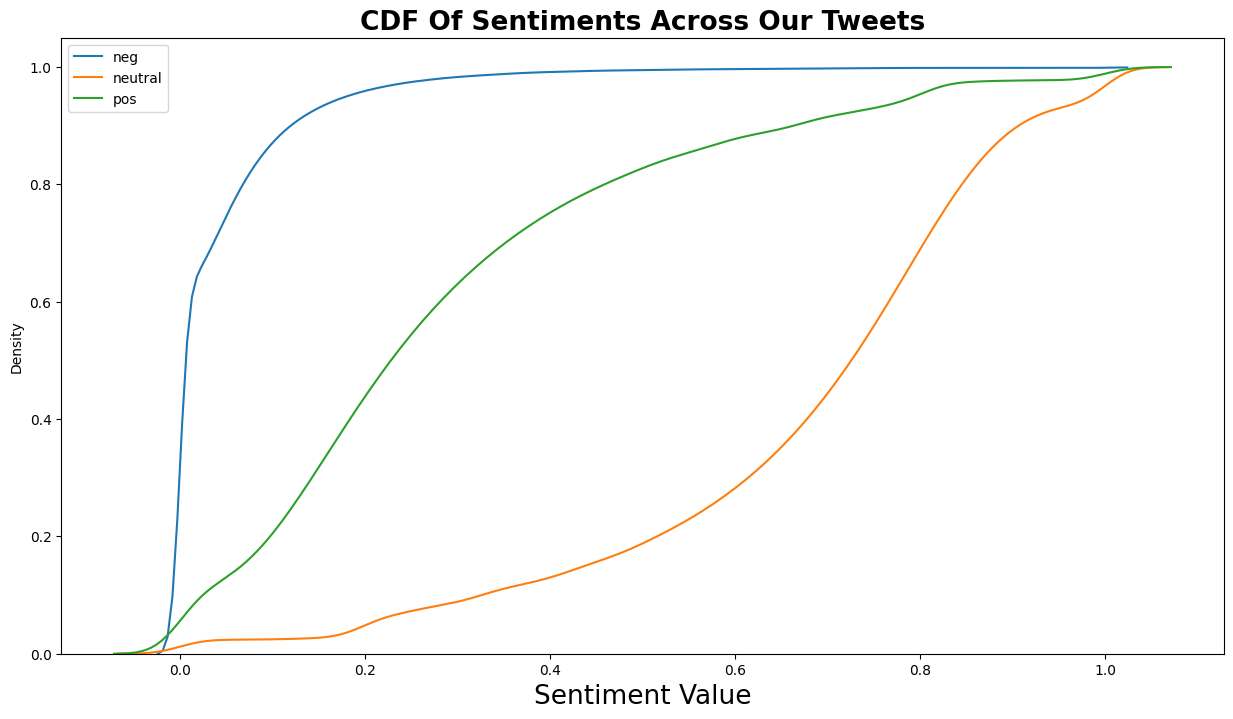

In [33]:

plt.figure(figsize = (15, 8))
plt.title('CDF Of Sentiments Across Our Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(M_data['neg'],bw=0.1,cumulative=True)
sns.kdeplot(M_data['neu'],bw=0.1,cumulative=True)
sns.kdeplot(M_data['pos'],bw=0.1,cumulative=True)
plt.xlabel('Sentiment Value',fontsize=19)
plt.legend(['neg', 'neutral', 'pos'])
plt.show()

# Intepretation of the graph
- It is also clear that the dominant sentiment is neutral; oddly, most of the reviews do not resemble more positive or negative sentiment rather than neutral.

In [34]:
M_data.dropna(inplace = True)

Creating a class column based on compound score

In [35]:
M_data.insert(0, 'Class', np.nan)
M_data.loc[M_data['compound']>=0.05, 'Class'] = 'pos'
M_data.loc[M_data['compound']<=-0.05, 'Class'] = 'neg'
M_data.loc[((M_data['compound'] > -0.05) & (M_data['compound'] < 0.05)), 'Class'] = 'neutral'

In [36]:
M_data['year'] = pd.DatetimeIndex(M_data['reviewTime']).year
M_data['month'] = pd.DatetimeIndex(M_data['reviewTime']).month

Converting the final sentiment score dataframe to a csv file 

In [37]:
M_data.to_csv("M_datafinal.csv")

In [38]:
M_data.head()

,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,title,category,price,brand,Sentiment,neg,neu,pos,compound,year,month
1,pos,B00004U9V2,i bought two of these fl oz hand cream and nei...,D. Poston,2.0,1.276560e+09,2010-06-15,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,,Neg,0.038,0.781,0.181,0.9370,2010,6
3,pos,B00004U9V2,believe me over the years i have tried many ma...,chandra,5.0,1.262822e+09,2010-01-07,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,,Pos,0.174,0.581,0.244,0.2960,2010,1
5,pos,B00004U9V2,great hand lotion,Maureen G,5.0,1.524010e+09,2018-04-18,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,,Pos,0.000,0.892,0.108,0.3182,2018,4
7,pos,B00004U9V2,this is the best for the severely dry skin on ...,Terry K,5.0,1.524010e+09,2018-04-18,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,,Pos,0.000,0.288,0.712,0.8126,2018,4
9,pos,B00004U9V2,the best non oily hand cream ever it heals ove...,Patricia Wood,5.0,1.523923e+09,2018-04-17,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,,Pos,0.000,0.549,0.451,0.6249,2018,4


# Text Classification

- Text classification also known as text tagging or text categorization is the process of categorizing text into organized groups. By using Natural Language Processing (NLP), text classifiers can automatically analyze text and then assign a set of pre-defined tags or categories based on its content.

In [39]:
df = pd.read_csv('M_datafinal.csv')
df.head()

,Unnamed: 0,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,title,category,price,brand,Sentiment,neg,neu,pos,compound,year,month
0,1,pos,B00004U9V2,i bought two of these fl oz hand cream and nei...,D. Poston,2.0,1.276560e+09,2010-06-15,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,NaN,Neg,0.038,0.781,0.181,0.9370,2010,6
1,3,pos,B00004U9V2,believe me over the years i have tried many ma...,chandra,5.0,1.262822e+09,2010-01-07,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,NaN,Pos,0.174,0.581,0.244,0.2960,2010,1
2,5,pos,B00004U9V2,great hand lotion,Maureen G,5.0,1.524010e+09,2018-04-18,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,NaN,Pos,0.000,0.892,0.108,0.3182,2018,4
3,7,pos,B00004U9V2,this is the best for the severely dry skin on ...,Terry K,5.0,1.524010e+09,2018-04-18,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,NaN,Pos,0.000,0.288,0.712,0.8126,2018,4
4,9,pos,B00004U9V2,the best non oily hand cream ever it heals ove...,Patricia Wood,5.0,1.523923e+09,2018-04-17,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,NaN,Pos,0.000,0.549,0.451,0.6249,2018,4


In [40]:
df["reviewTime"] = pd.to_datetime(df["reviewTime"])

In [41]:
df.isnull().sum()

Unnamed: 0             0
Class                  0
asin                   0
reviewText           120
reviewerName          31
overall                0
unixReviewTime         0
reviewTime             0
title                  0
category               0
price              85238
brand             477111
Sentiment              0
neg                    0
neu                    0
pos                    0
compound               0
year                   0
month                  0
dtype: int64

In [42]:
df.dropna(inplace = True)

Dropping the unnamed column

In [43]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [44]:
# slicing the data
df1 = df.iloc[:100, :]
df1.head()

,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,title,category,price,brand,Sentiment,neg,neu,pos,compound,year,month
295185,pos,B005EMSRDG,the shampoo is excellent what i do not like is...,Juan Casanova,4.0,1.415923e+09,2014-11-14,phytolium botanical strengthening shampoo thin...,[],$24.00,PHYTO,Pos,0.0,0.740,0.260,0.9747,2014,11
295186,pos,B005EMSRDG,my hair is actually thicker,Anita Oelke,5.0,1.468541e+09,2016-07-15,phytolium botanical strengthening shampoo thin...,[],$24.00,PHYTO,Pos,0.0,0.704,0.296,0.6369,2016,7
295187,pos,B005EMSRDG,i have been using this shampoo for months and ...,Lu Worrell,1.0,1.462752e+09,2016-05-09,phytolium botanical strengthening shampoo thin...,[],$24.00,PHYTO,Neg,0.0,0.427,0.573,0.9201,2016,5
295188,pos,B005EMSRDG,mostly snake oil as most of these product but ...,Gorilla,2.0,1.452643e+09,2016-01-13,phytolium botanical strengthening shampoo thin...,[],$24.00,PHYTO,Neg,0.0,0.922,0.078,0.7640,2016,1
295189,neutral,B005EMSRDG,this is the best shampoo i ve ever used really...,Yoda Flame,5.0,1.450310e+09,2015-12-17,phytolium botanical strengthening shampoo thin...,[],$24.00,PHYTO,Pos,0.0,1.000,0.000,0.0000,2015,12


### Removing Stop Words

Stop words are commonly used words in a language that are generally considered to be of little value in determining the meaning or sentiment of a text. Examples of stop words in English include "the", "a", "an", "in", "on", "is", "and", "of", "at", "to", and so on.

In natural language processing, stop words are often removed from texts before further processing such as sentiment analysis, topic modeling, or text classification. This is because stop words can introduce noise into the analysis and may not add any meaningful information to the text. Removing stop words can also help reduce the computational complexity of processing large volumes of text.


In [45]:
nltk.download('stopwords')
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sudha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Applying the stop word function on the reviewText Column

In [46]:
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

Making WordCloud

In [47]:
stopwords = set(STOPWORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "black",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords,
    scale = 3).generate(str(df['reviewText']))
    fig = plt.figure(figsize = (15, 15))
    plt.axis("off")
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.25)
    plt.imshow(wordcloud)
    plt.show()

In [48]:
df.columns

Index(['Class', 'asin', 'reviewText', 'reviewerName', 'overall',
       'unixReviewTime', 'reviewTime', 'title', 'category', 'price', 'brand',
       'Sentiment', 'neg', 'neu', 'pos', 'compound', 'year', 'month'],
      dtype='object')

In [49]:
neg=df[df["Class"] == "Neg"]["reviewText"]
pos=df[df["Class"] == "Pos"]["reviewText"]
neu=df[df["Class"] == "Neutral"]["reviewText"]

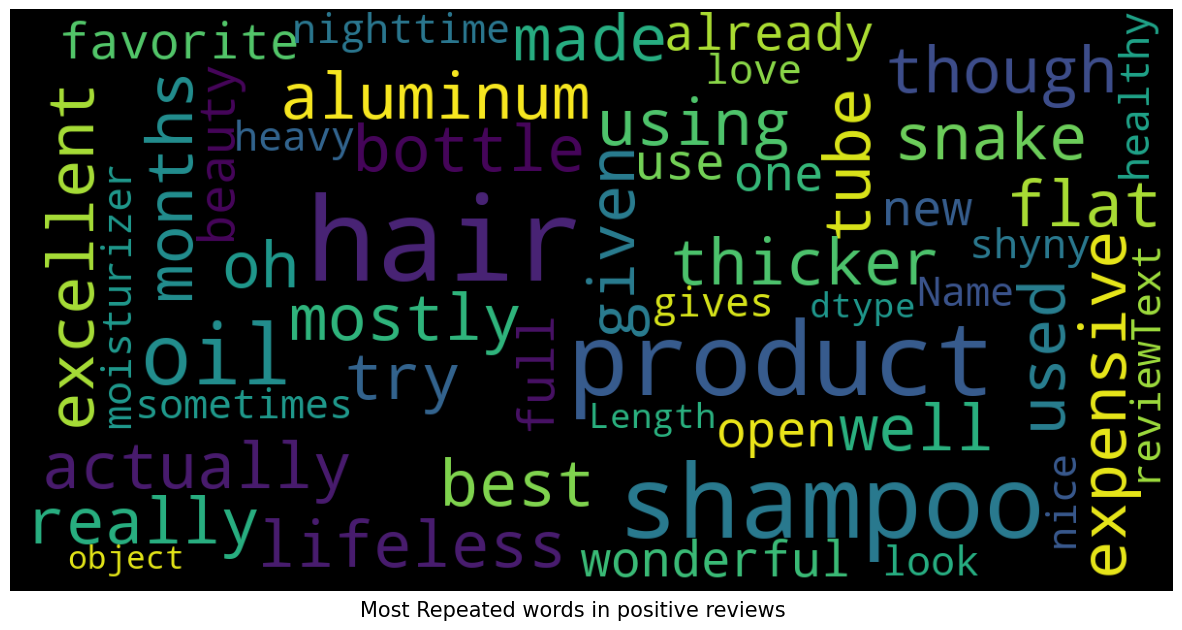

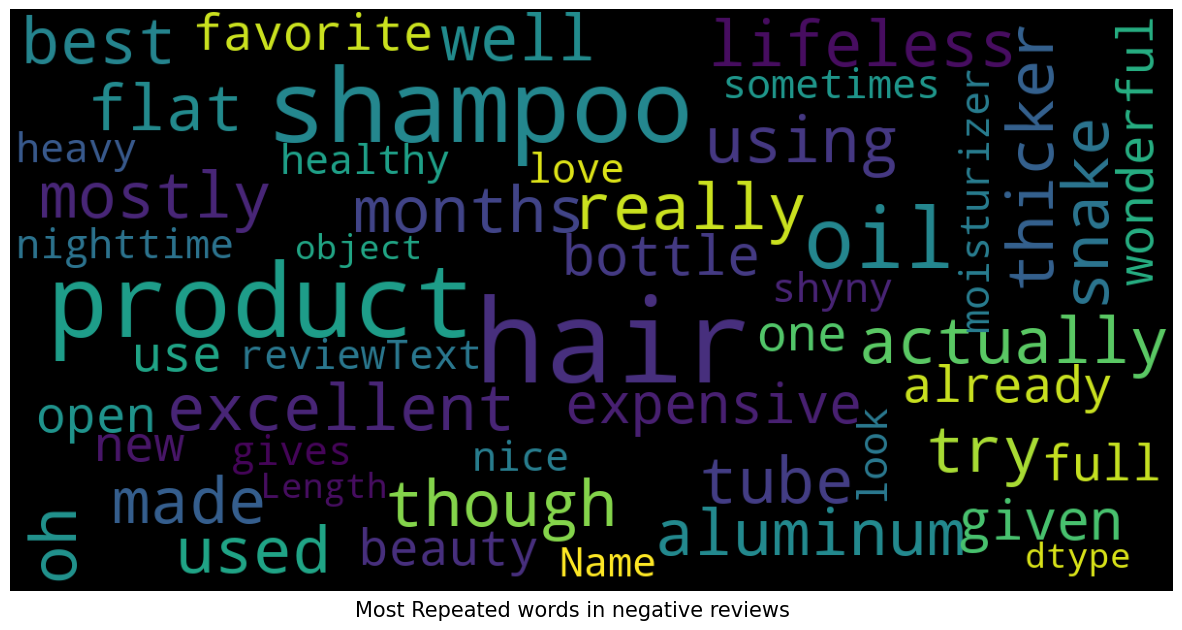

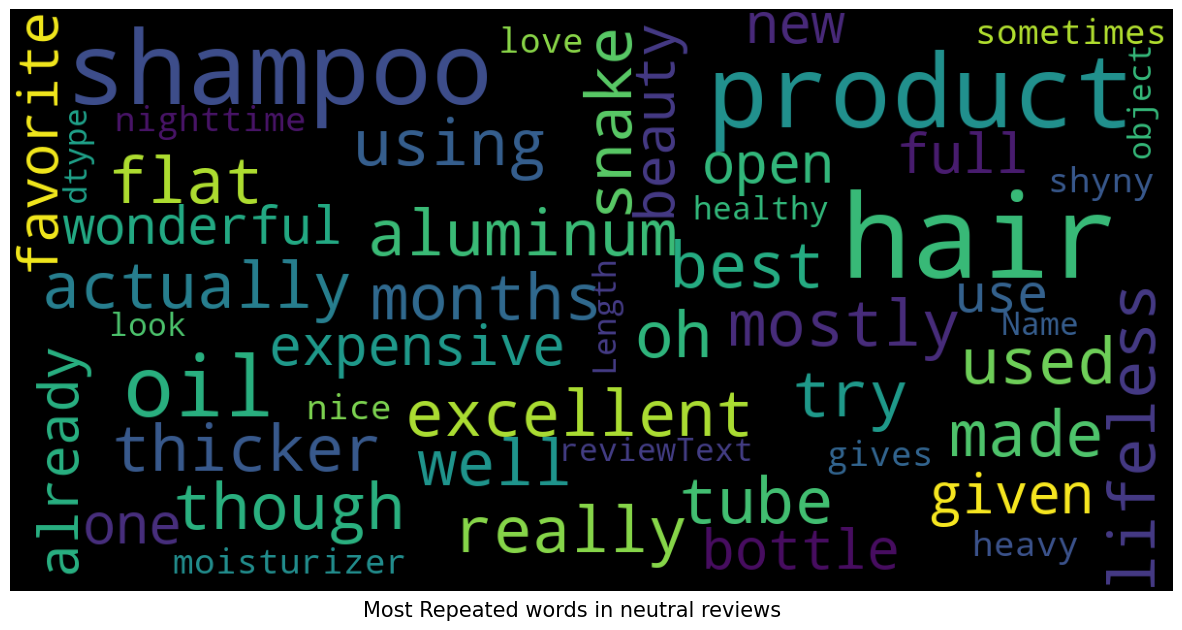

In [50]:
word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(neg, "Most Repeated words in negative reviews")
word_cloud(neu, "Most Repeated words in neutral reviews")

#### From about WordCLoud We can see the most used positive,negative and neutral words from the reviewText

## Building the model for Sentiment Prediction

In [51]:
df=pd.read_csv('M_datafinal.csv')

In [52]:
df.head(10)

,Unnamed: 0,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,title,category,price,brand,Sentiment,neg,neu,pos,compound,year,month
0,1,pos,B00004U9V2,i bought two of these fl oz hand cream and nei...,D. Poston,2.0,1.276560e+09,2010-06-15,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,NaN,Neg,0.038,0.781,0.181,0.9370,2010,6
1,3,pos,B00004U9V2,believe me over the years i have tried many ma...,chandra,5.0,1.262822e+09,2010-01-07,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,NaN,Pos,0.174,0.581,0.244,0.2960,2010,1
2,5,pos,B00004U9V2,great hand lotion,Maureen G,5.0,1.524010e+09,2018-04-18,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,NaN,Pos,0.000,0.892,0.108,0.3182,2018,4
3,7,pos,B00004U9V2,this is the best for the severely dry skin on ...,Terry K,5.0,1.524010e+09,2018-04-18,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,NaN,Pos,0.000,0.288,0.712,0.8126,2018,4
4,9,pos,B00004U9V2,the best non oily hand cream ever it heals ove...,Patricia Wood,5.0,1.523923e+09,2018-04-17,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,NaN,Pos,0.000,0.549,0.451,0.6249,2018,4
5,11,pos,B00004U9V2,ive used this lotion for many years i try othe...,Ralla,5.0,1.523664e+09,2018-04-14,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,NaN,Pos,0.130,0.573,0.297,0.8225,2018,4
6,13,pos,B00004U9V2,works great for dry hands,Lydia Speight,5.0,1.523405e+09,2018-04-11,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,NaN,Pos,0.000,0.120,0.880,0.8074,2018,4
7,15,pos,B00004U9V2,the best hand cream ever,Allen Semer,5.0,1.523405e+09,2018-04-11,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,NaN,Pos,0.000,0.381,0.619,0.7579,2018,4
8,17,pos,B00004U9V2,love this scent but crabtree and evelyn make s...,Vets park,5.0,1.523059e+09,2018-04-07,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,NaN,Pos,0.000,0.465,0.535,0.7845,2018,4
9,19,pos,B00004U9V2,its a great moisturizer especially for gardners,Cynthia P. Irving,5.0,1.522973e+09,2018-04-06,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,NaN,Pos,0.086,0.702,0.212,0.6692,2018,4


### Building model for prediction


In [53]:
from sklearn.metrics import ConfusionMatrixDisplay

In [54]:
X = df['reviewText']
Y = df['Sentiment']

In [55]:
X, Y = df.reviewText.fillna(' '), df.Sentiment

In [56]:
X.value_counts()

love it                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [57]:
Y.value_counts()

Pos        377186
Neg         65757
Neutral     34441
Name: Sentiment, dtype: int64

In [58]:
Y = LabelEncoder().fit_transform(Y)
Y

array([0, 2, 2, ..., 2, 2, 0])

In [59]:
unique, counts = np.unique(Y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0  65757]
 [     1  34441]
 [     2 377186]]


Spitting the Training and Testing Data

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Applying TFIDF Vectorizer to convert Reviewtext to vector for model prediction

In [61]:
vectorizer = TfidfVectorizer(sublinear_tf = True, max_df = 0.1, min_df = 1,
                             use_idf = True, smooth_idf = True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

### Applying different model to get best models for classification

Considering different classification algorithms for prediction

#### Using Naive Bayes Classification

Making the model and fitting the data

In [62]:
model1 = MultinomialNB().fit(X_train, Y_train)
y_pred1 = model1.predict(X_test)

Printing classification matrix

In [63]:
print(classification_report(Y_test, y_pred1, target_names = ['neg', 'nue', 'pos']))

              precision    recall  f1-score   support

         neg       0.88      0.24      0.37     19741
         nue       0.48      0.00      0.01     10226
         pos       0.82      1.00      0.90    113249

    accuracy                           0.82    143216
   macro avg       0.73      0.41      0.43    143216
weighted avg       0.80      0.82      0.76    143216



#### Using Logistic Regression Model

Making the model and fitting the data

In [64]:
model = LogisticRegression(multi_class = 'ovr').fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [65]:
unique, counts = np.unique(y_pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0  16740]
 [     1   2761]
 [     2 123715]]


Printing the confustion matrix for Logistic Regression

In [66]:
%%time
print(classification_report(Y_test, y_pred, target_names = ['neg', 'neu', 'pos']))

              precision    recall  f1-score   support

         neg       0.75      0.64      0.69     19741
         neu       0.50      0.13      0.21     10226
         pos       0.89      0.98      0.93    113249

    accuracy                           0.87    143216
   macro avg       0.71      0.58      0.61    143216
weighted avg       0.85      0.87      0.85    143216

CPU times: total: 62.5 ms
Wall time: 213 ms


### Testing classification by putting sample reviews in the model

In [67]:
a = ['Nice product good to buy', 'worst product waste of money', 'Good product but not useful for this']
a1 = vectorizer.transform(a)

In [68]:
fo = model.predict(a1)
fo

array([2, 0, 2])

In [69]:
s = pd.DataFrame({"Random_review":a, "Predictions": ['Positive', 'Negative', 'Positive']})
s

,Random_review,Predictions
0,Nice product good to buy,Positive
1,worst product waste of money,Negative
2,Good product but not useful for this,Positive


As you can see that the Logistic Regression Model is working fine and classifying correctly

#### Using ADABoost Classifier

In [70]:
from sklearn.ensemble import AdaBoostClassifier  

Making the model and fitting the data

In [71]:
model2 = AdaBoostClassifier().fit(X_train, Y_train)
Y_pred3 = model2.predict(X_test)

Printing the classification Matrix for AdaBoost Classifier

In [72]:
print(classification_report(Y_test, Y_pred3, target_names = ['neg', 'nue', 'pos']))

              precision    recall  f1-score   support

         neg       0.67      0.35      0.46     19741
         nue       0.44      0.06      0.11     10226
         pos       0.84      0.98      0.90    113249

    accuracy                           0.82    143216
   macro avg       0.65      0.46      0.49    143216
weighted avg       0.79      0.82      0.79    143216



## Time Series Analysis of Sentiments

In [73]:
df1 = df[['neg', 'pos','neu', 'reviewTime']]

In [74]:
df1.head()

,neg,pos,neu,reviewTime
0,0.038,0.181,0.781,2010-06-15
1,0.174,0.244,0.581,2010-01-07
2,0.000,0.108,0.892,2018-04-18
3,0.000,0.712,0.288,2018-04-18
4,0.000,0.451,0.549,2018-04-17


In [75]:
df1['reviewTime'] = pd.to_datetime(df1['reviewTime'])

In [76]:
df1.head()

,neg,pos,neu,reviewTime
0,0.038,0.181,0.781,2010-06-15
1,0.174,0.244,0.581,2010-01-07
2,0.000,0.108,0.892,2018-04-18
3,0.000,0.712,0.288,2018-04-18
4,0.000,0.451,0.549,2018-04-17


In [77]:
df1 = df1.set_index('reviewTime')
df1.head()

,neg,pos,neu
reviewTime,,,
2010-06-15,0.038,0.181,0.781
2010-01-07,0.174,0.244,0.581
2018-04-18,0.000,0.108,0.892
2018-04-18,0.000,0.712,0.288
2018-04-17,0.000,0.451,0.549


Resampling the data based on weekly dates to fit into the Seasonal Decompose Graph

In [78]:
df1 = df1.resample('W').sum()
df1.shape

(762, 3)

#### Seasonal Decompose for Positive Sentiments

Text(0.5, 1.0, 'Pos_residual')

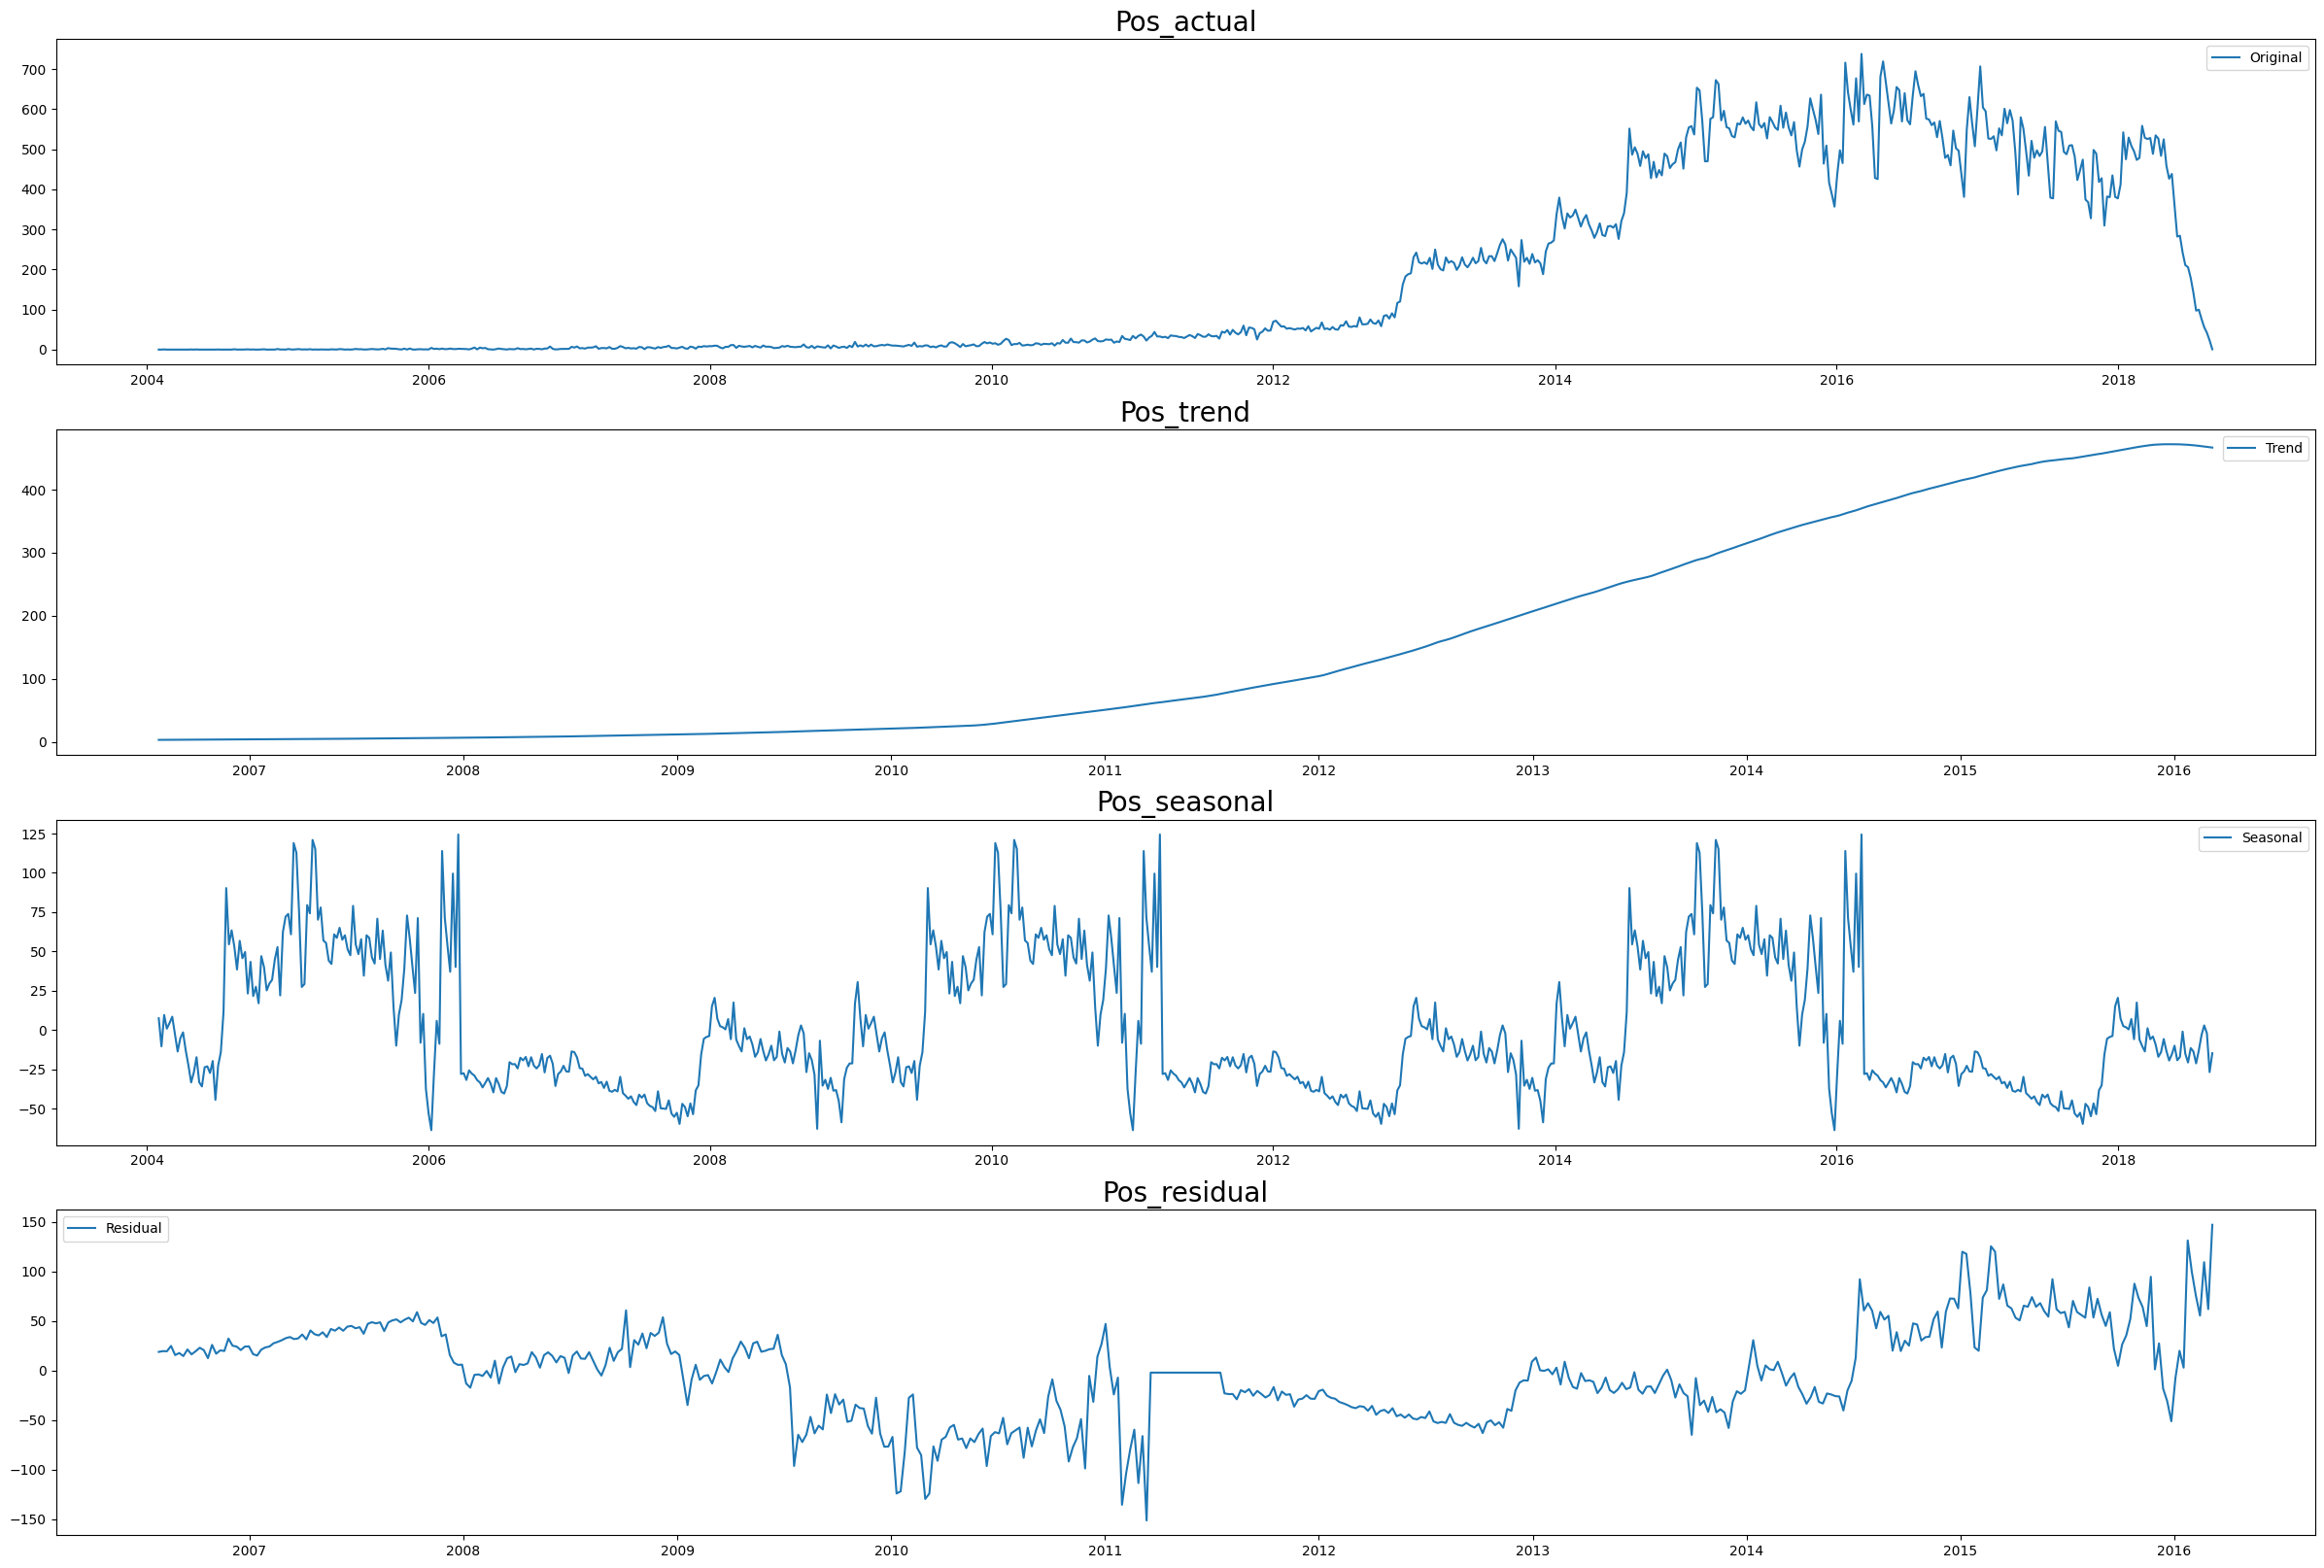

In [79]:


decomposition=seasonal_decompose(df1['pos'], period=260)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid


fig,ax = plt.subplots(4,2,figsize=(30,20))

plt.subplot(411)
plt.plot(df1['pos'],label='Original')
plt.legend(loc='best')
plt.title('Pos_actual', fontsize = 20)

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')
plt.title('Pos_trend', fontsize = 20)

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')
plt.title('Pos_seasonal', fontsize = 20)

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')
plt.title('Pos_residual', fontsize = 20)

### <div class="alert alert-info">Interpretation
- **Above plots shows the time series decomposition and we can see the components of time series for positive reviews**
- **First plot is actual data plot with weekly dispersed data points**
- **Second one shows the trend in the data where we can see there is positive trend in the dataset**
- **Third plot shows the seasonality which we can see some repetitions over the period of time**
- **Last plot shows the irregularity in the the data over a period of time we can see some irregular kind over a period in the plot**

#### Seasonal Decompose for Negative Sentiment  

Text(0.5, 1.0, 'neg_residual')

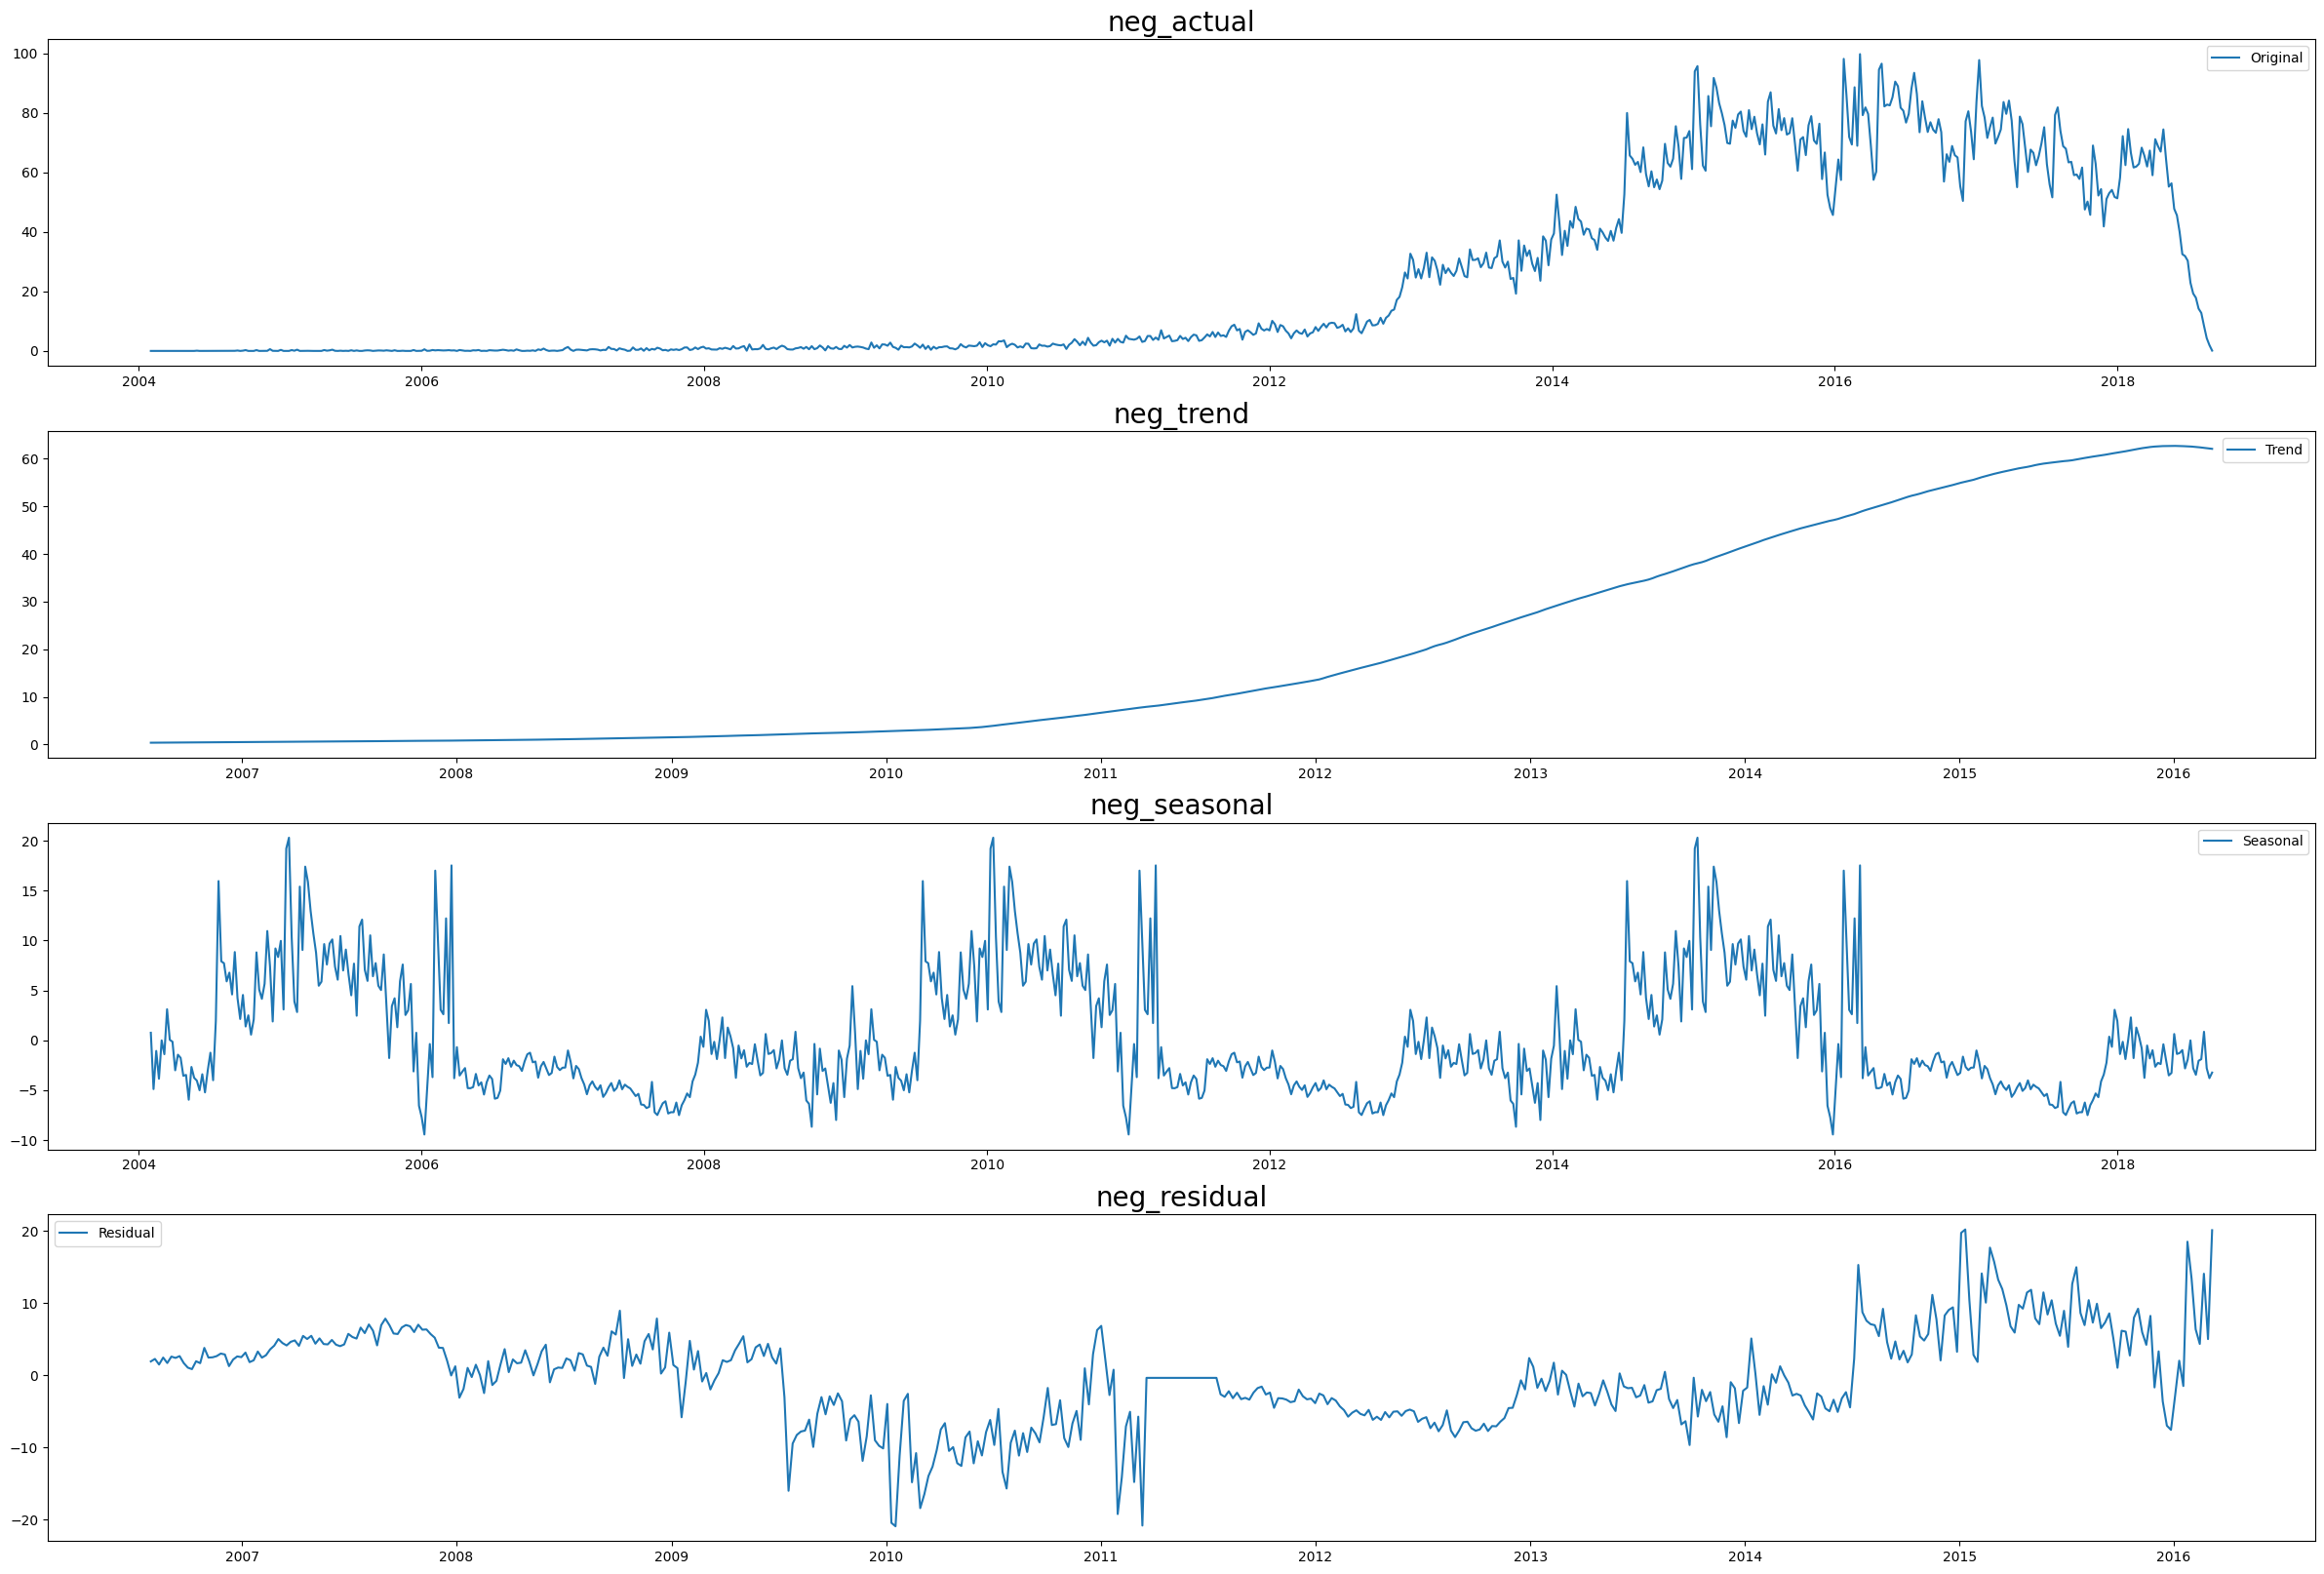

In [80]:
# Seasonal Decompose For Negative Reviews
decomposition=seasonal_decompose(df1['neg'], period=260)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid


fig,ax = plt.subplots(4,2,figsize=(30,20))

plt.subplot(411)
plt.plot(df1['neg'],label='Original')
plt.legend(loc='best')
plt.title('neg_actual', fontsize = 20)

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')
plt.title('neg_trend', fontsize = 20)

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')
plt.title('neg_seasonal', fontsize = 20)

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')
plt.title('neg_residual', fontsize = 20)

### <div class="alert alert-info">Interpretation
- **Above plots shows the time series decomposition and we can see the components of time series for negative reviews**
- **First plot is actual data plot with weekly dispersed data points**
- **Second one shows the trend in the data where we can see there is positive trend in the dataset**
- **Third plot shows the seasonality which we can see some repetitions over the period of time**
- **Last plot shows the irregularity in the the data over a period of time we can see some irregular kind over a period in the plot**

#### Seasonal Decompose for Neutral Reviews

Text(0.5, 1.0, 'neu_residual')

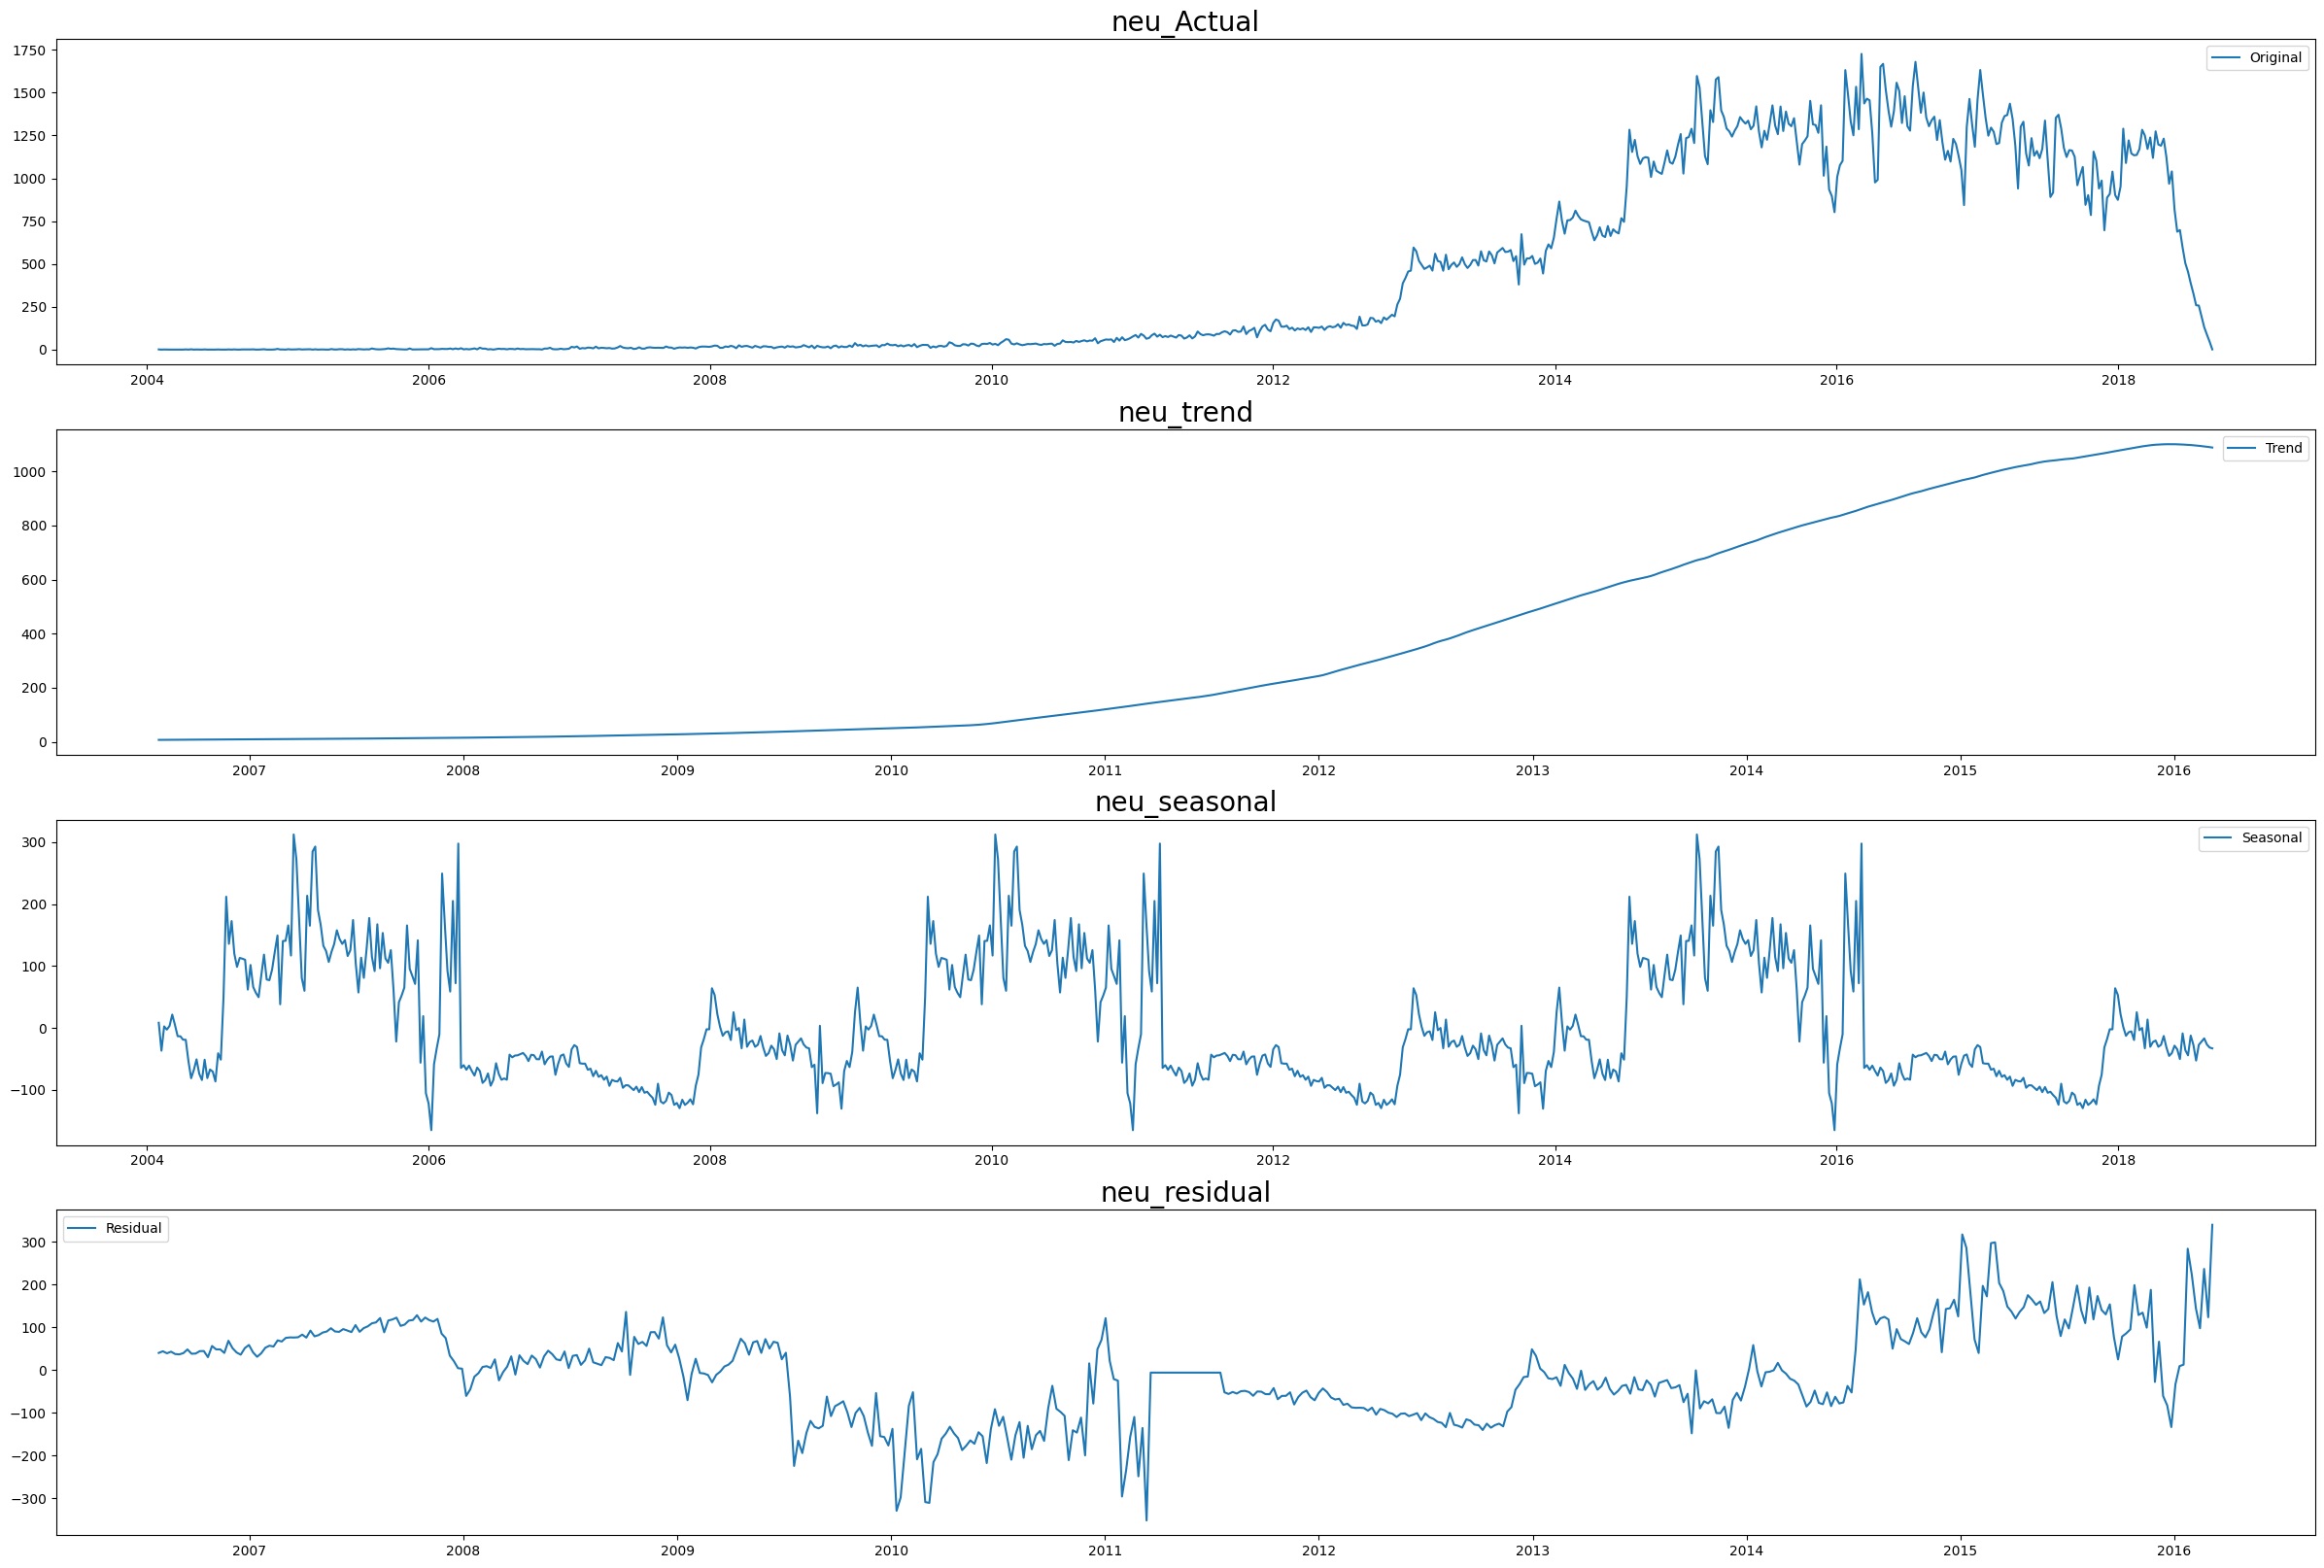

In [81]:
# Seasonal Decompose For Negative Reviews
decomposition=seasonal_decompose(df1['neu'], period=260)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid


fig,ax = plt.subplots(4,2,figsize=(30,20))

plt.subplot(411)
plt.plot(df1['neu'],label='Original')
plt.legend(loc='best')
plt.title('neu_Actual', fontsize = 20)

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')
plt.title('neu_trend', fontsize = 20)

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')
plt.title('neu_seasonal', fontsize = 20)

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')
plt.title('neu_residual', fontsize = 20)

### <div class="alert alert-info">Interpretation
- **Above plots shows the time series decomposition and we can see the components of time series for neutral reviews**
- **First plot is actual data plot with weekly dispersed data points**
- **Second one shows the trend in the data where we can see there is positive trend in the dataset**
- **Third plot shows the seasonality which we can see some repetitions over the period of time**
- **Last plot shows the irregularity in the the data over a period of time we can see some irregular kind over a period in the plot**

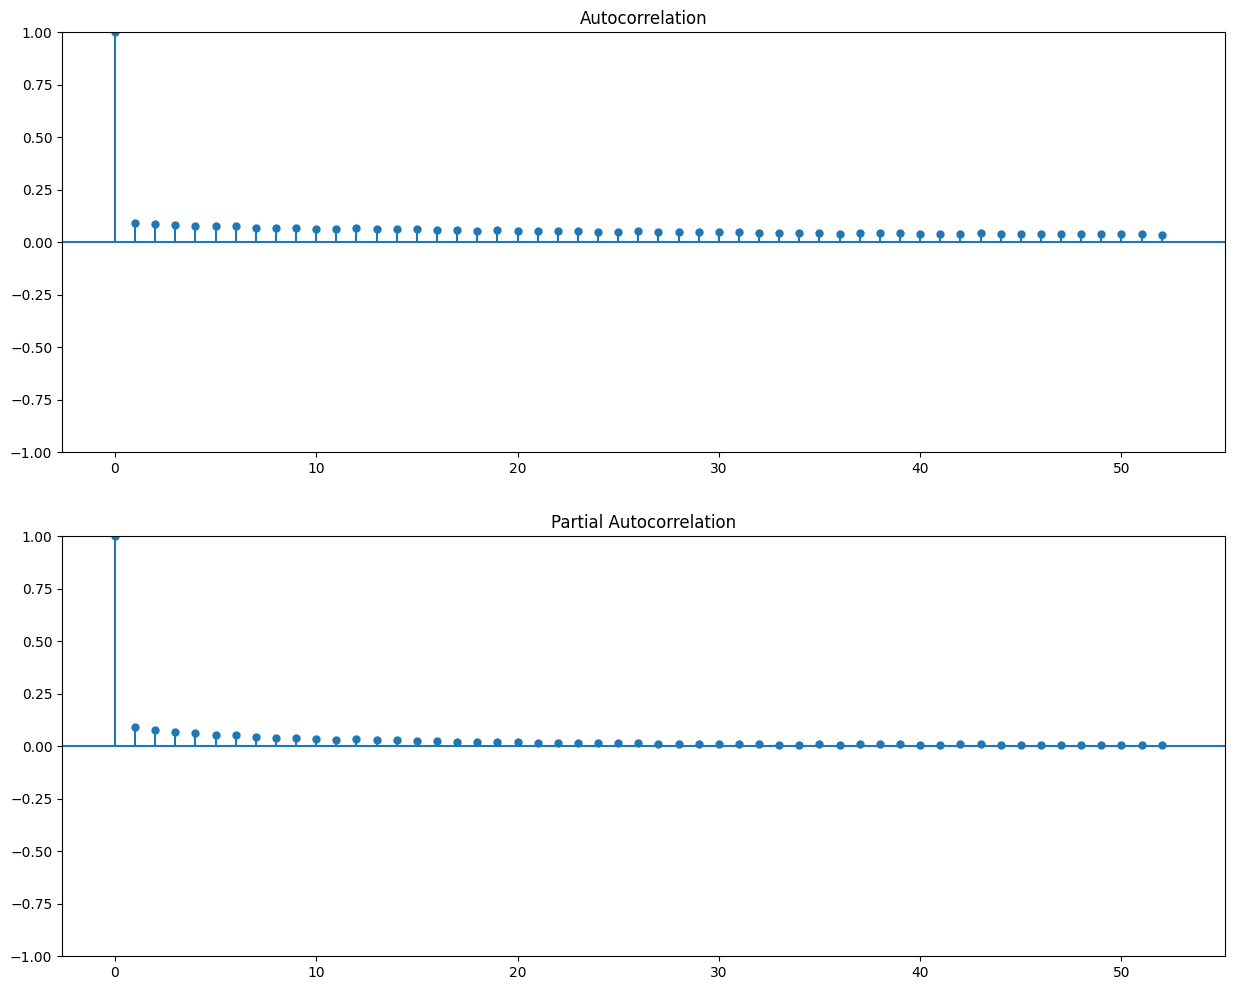

In [82]:
plt.figure(figsize=(15,12))
plt.subplot(211)
plot_acf(df['pos'], ax=plt.gca(), lags = 52)
plt.subplot(212)
plot_pacf(df['pos'], ax=plt.gca(), lags = 52)
plt.show()

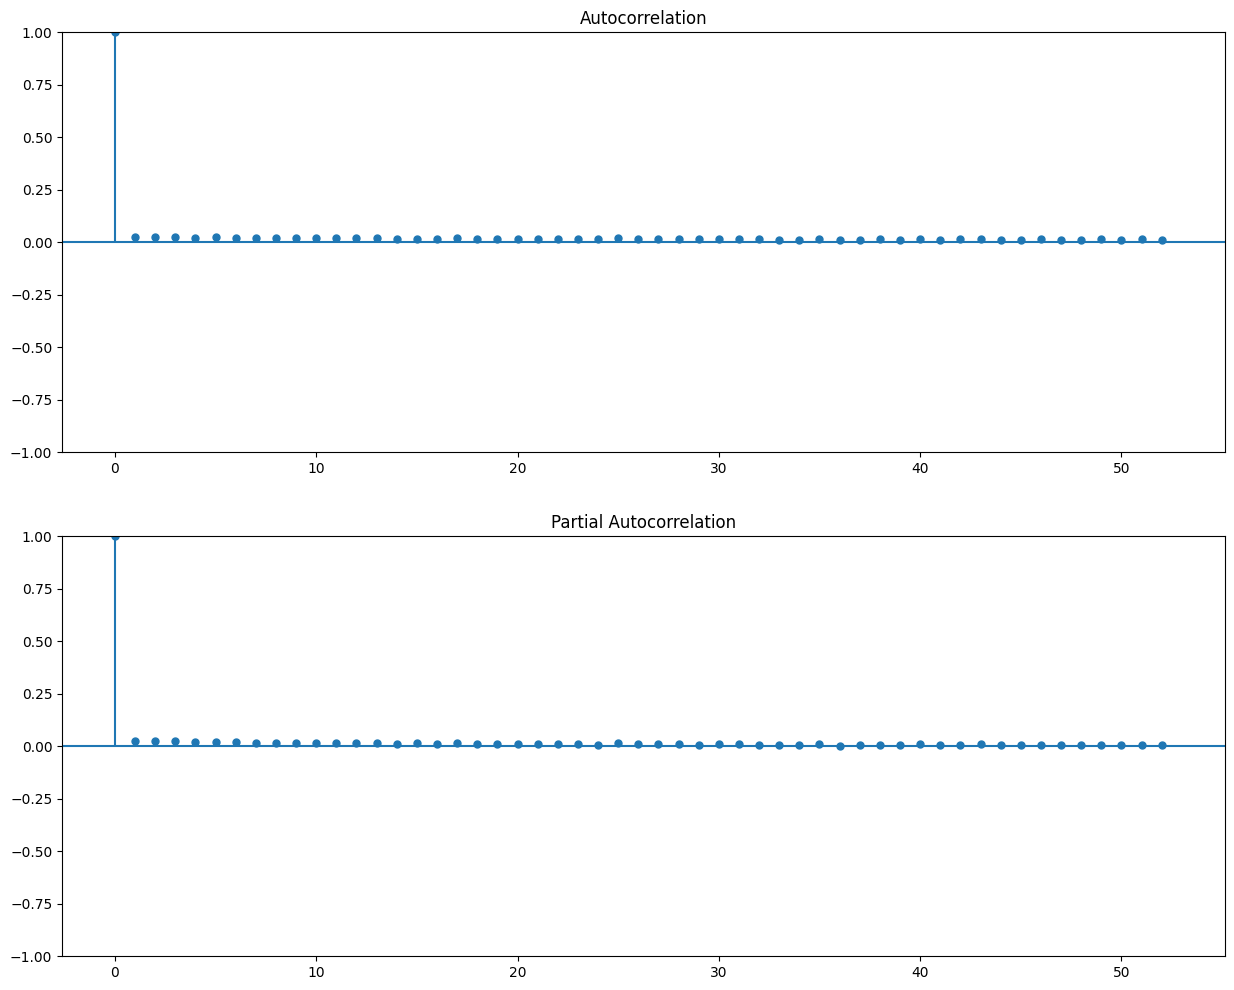

In [83]:
plt.figure(figsize=(15,12))
plt.subplot(211)
plot_acf(df['neg'], ax=plt.gca(), lags = 52)
plt.subplot(212)
plot_pacf(df['neg'], ax=plt.gca(), lags = 52)
plt.show()

### Checking Stationarity of the Dataset

In [84]:
def checkstationary(df):
    pvalue = adfuller(df)[1]
    if pvalue < 0.05:
        ret = 'Pvalue:{}. Data is stationary, Proceed to model building'.format(pvalue)
    else:
        ret = 'Pvalue:{}.Data is not stationary, make data stationary'.format(pvalue)
    return ret

In [85]:
checkstationary(df1['neg'])

'Pvalue:0.6656695652834931.Data is not stationary, make data stationary'

**- From augmented dickey fuller test we can see that the data is not stationary so we should do diffrencing or d = 1 while building the model for prediction**</div>

In [86]:
checkstationary(df1['pos'])

'Pvalue:0.6829128248592286.Data is not stationary, make data stationary'

**- From augmented dickey fuller test we can see that the data is not stationary so we should do diffrencing or d = 1 while building the model for prediction**

## Predicting Sentiments 

Splitting the Data for fitting into Sarimax Model

In [87]:
split = int(0.95 * len(df1))
train = df1.iloc[:split]
test = df1.iloc[split:]
print("Train = {}, Test = {}".format(len(train), len(test)))

Train = 723, Test = 39


Creating a Sarimax function to get optimum p and q values

In [88]:
def sarima_model(p,d,q,P,D,Q):
    sm1=SARIMAX(train,order=(p,d,q),seasonal_order=(P,D,Q,52)).fit()
    f1=sm1.forecast(len(test))
    actual=[]
    predicted=[]
    for i in range(len(f1)):
        actual.append(test[i])
        predicted.append(f1[i])
    RMSE=round(mean_squared_error(actual,predicted,squared=False),3)
    return RMSE,actual,predicted

In [89]:
def SARMA1(df):
    model2 = SARIMAX(train['neg'],order=(1, 1, 2),seasonal_order=(1,1,2,52)).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model2.summary()
    pred1 = model2.predict()
    forecast1 = model2.forecast(len(test['neg'])+20)
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1

In [90]:
def SARMA2(df):
    model2 = SARIMAX(train['pos'],order=(1, 1, 2),seasonal_order=(1,1,2,52)).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model2.summary()
    pred1 = model2.predict()
    forecast1 = model2.forecast(len(test['pos'])+20)
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1

In [91]:
train1 = SARMA1(train['neg'])

Summary : S
past_predictions : past
future_predictions : future


In [92]:
train2 = SARMA2(train['pos'])

Summary : S
past_predictions : past
future_predictions : future


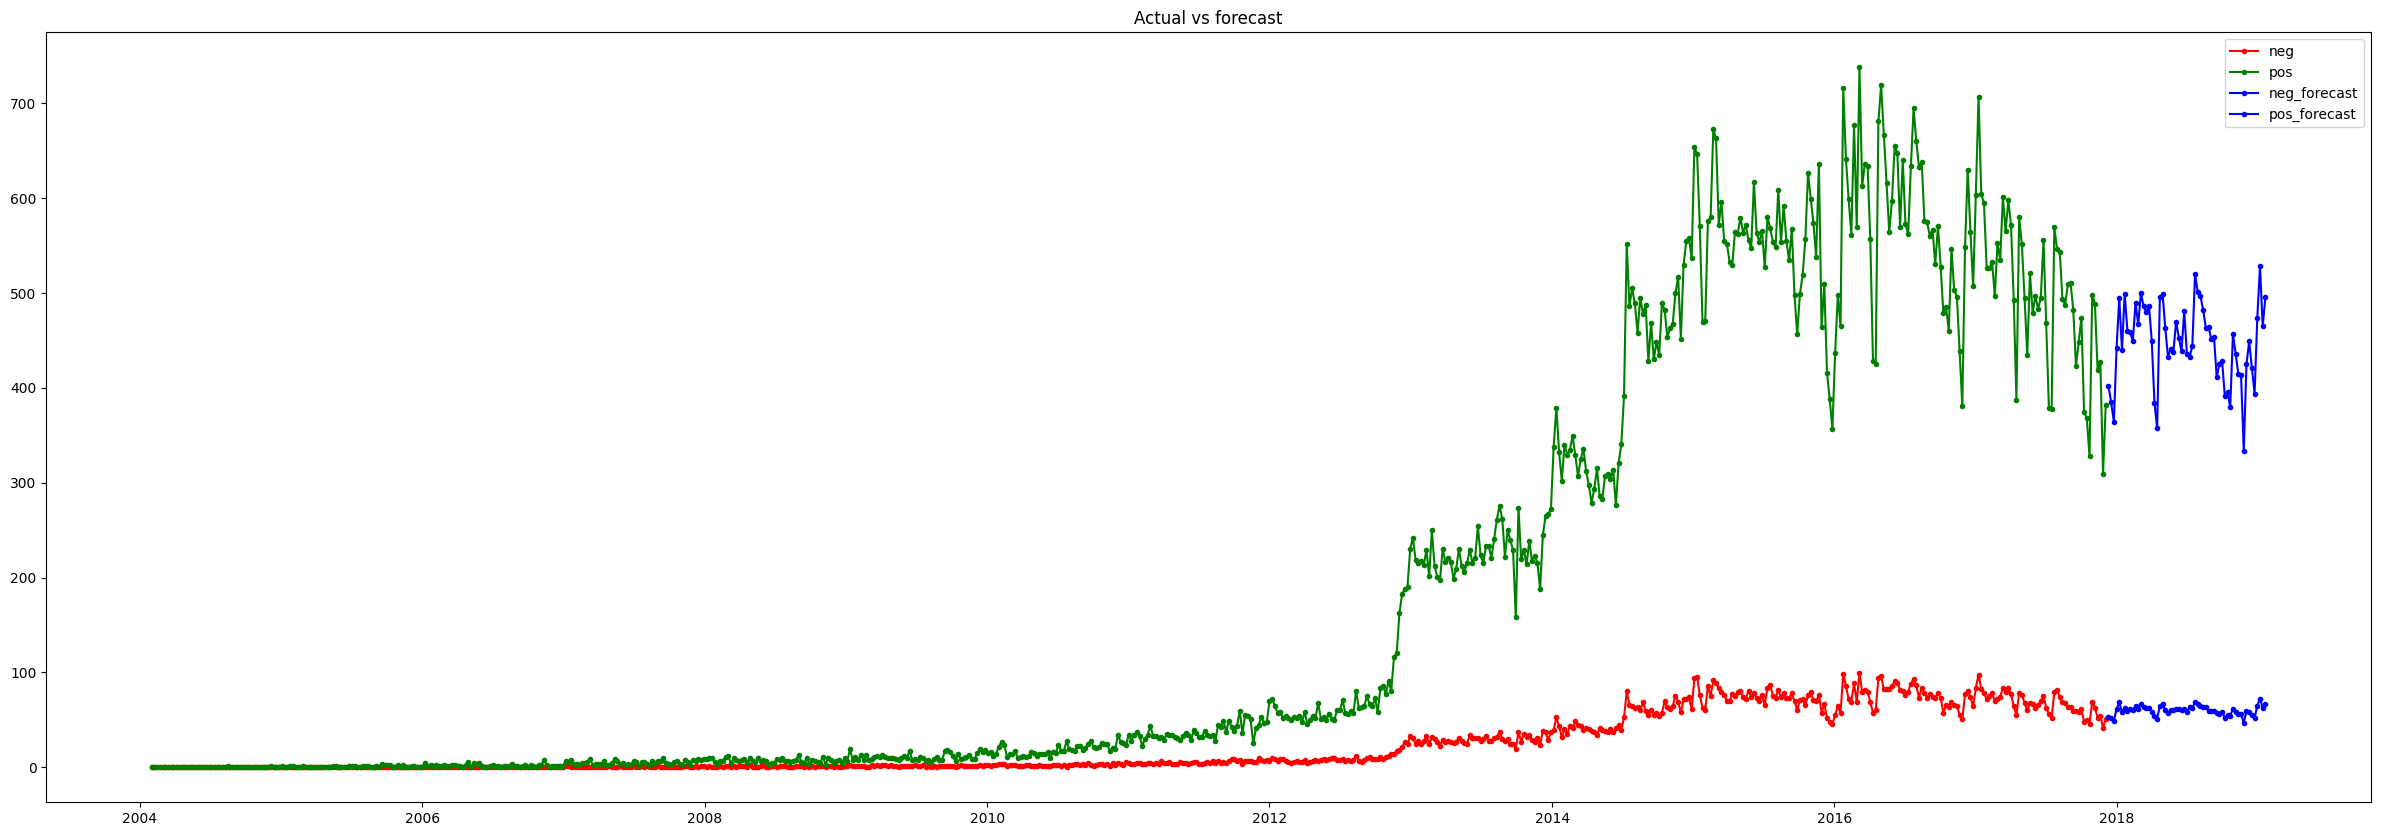

In [93]:
plt.figure(figsize=(30,10))
plt.title('Actual vs forecast')
plt.plot(train['neg'],marker = '.', label = 'neg', color = 'red')
plt.plot(train['pos'],marker = '.', label = 'pos', color = 'g')
plt.plot(train1,marker = '.', label = 'neg_forecast', color = 'b')
plt.plot(train2,marker = '.', label = 'pos_forecast', color = 'b')
plt.legend()

In [94]:
pos_rmse = np.sqrt(mean_squared_error(test['pos'], train2[:-20]))
neg_rmse = np.sqrt(mean_squared_error(test['pos'], train1[:-20]))

In [95]:
res = pd.DataFrame({'Sentiments':['Pos', 'neg'], 'RMSE':[pos_rmse, neg_rmse]})
res

,Sentiments,RMSE
0,Pos,212.509478
1,neg,342.860180


### <div class="alert alert-info">Interpretation
**- From both visualization as well as the error values of forcast data we can see the SARIMA model is giving good forcast results and the positive and negative reviews are increasing over period but the positive reviews are inresing in more percent compare to negative review**</div>

### Time series analysis of the price of the sector

In [96]:
df.head(200)

,Unnamed: 0,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,title,category,price,brand,Sentiment,neg,neu,pos,compound,year,month
0,1,pos,B00004U9V2,i bought two of these fl oz hand cream and nei...,D. Poston,2.0,1.276560e+09,2010-06-15,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,NaN,Neg,0.038,0.781,0.181,0.9370,2010,6
1,3,pos,B00004U9V2,believe me over the years i have tried many ma...,chandra,5.0,1.262822e+09,2010-01-07,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,NaN,Pos,0.174,0.581,0.244,0.2960,2010,1
2,5,pos,B00004U9V2,great hand lotion,Maureen G,5.0,1.524010e+09,2018-04-18,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,NaN,Pos,0.000,0.892,0.108,0.3182,2018,4
3,7,pos,B00004U9V2,this is the best for the severely dry skin on ...,Terry K,5.0,1.524010e+09,2018-04-18,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,NaN,Pos,0.000,0.288,0.712,0.8126,2018,4
4,9,pos,B00004U9V2,the best non oily hand cream ever it heals ove...,Patricia Wood,5.0,1.523923e+09,2018-04-17,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,NaN,Pos,0.000,0.549,0.451,0.6249,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,395,pos,B00004U9V2,just as described arrived on time,Amr,5.0,1.485734e+09,2017-01-30,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,NaN,Pos,0.027,0.778,0.195,0.7441,2017,1
196,397,pos,B00004U9V2,keeps my hands soft without being greasy and i...,Gaaber,5.0,1.485734e+09,2017-01-30,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,NaN,Pos,0.000,0.599,0.401,0.9610,2017,1
197,399,pos,B00004U9V2,works well on my skin type,Russ,5.0,1.485648e+09,2017-01-29,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,NaN,Pos,0.000,0.874,0.126,0.3818,2017,1
198,401,pos,B00004U9V2,this is my favorite hand cream it is not greas...,Joi Hill,5.0,1.485302e+09,2017-01-25,crabtree amp evelyn gardener s ultra-moisturis...,[],$30.00,NaN,Pos,0.000,0.553,0.447,0.9062,2017,1


In [97]:
df.describe()

,Unnamed: 0,overall,unixReviewTime,neg,neu,pos,compound,year,month
count,477384.00000,477384.000000,4.773840e+05,477384.000000,477384.000000,477384.000000,477384.000000,477384.000000,477384.000000
mean,288131.07743,4.233579,1.444007e+09,0.038212,0.672818,0.288170,0.534691,2015.281559,6.259255
std,152266.32059,1.292767,5.663475e+07,0.079819,0.224337,0.236941,0.430724,1.829030,3.453997
min,1.00000,1.000000,1.075248e+09,0.000000,0.000000,0.000000,-0.996200,2004.000000,1.000000
25%,145269.75000,4.000000,1.411862e+09,0.000000,0.573000,0.123000,0.371600,2014.000000,3.000000
50%,299344.50000,5.000000,1.449965e+09,0.000000,0.726000,0.227000,0.636900,2015.000000,6.000000
75%,419122.25000,5.000000,1.486598e+09,0.051000,0.822000,0.398000,0.855500,2017.000000,9.000000
max,538658.00000,5.000000,1.535328e+09,1.000000,1.000000,1.000000,0.999900,2018.000000,12.000000


In [98]:
df.isnull().sum()

Unnamed: 0             0
Class                  0
asin                   0
reviewText           120
reviewerName          31
overall                0
unixReviewTime         0
reviewTime             0
title                  0
category               0
price              85238
brand             477111
Sentiment              0
neg                    0
neu                    0
pos                    0
compound               0
year                   0
month                  0
dtype: int64

Replacing the $(dollar) sign from the price to blank to convert the column into a int dataframe from str dataframe

In [112]:
df['price'] = df['price'].str.replace('$', '')

Replacing the NaN values with a space

In [113]:
df['price'] = df['price'].str.replace('NaN', '')

Filling empty places with 0

In [114]:
df['price'].fillna('', inplace=True)

In [115]:
df['price'] = df['price'].replace('', '0')


In [116]:
df.head(100)

,Unnamed: 0,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,title,category,price,brand,Sentiment,neg,neu,pos,compound,year,month
0,1,pos,B00004U9V2,i bought two of these fl oz hand cream and nei...,D. Poston,2.0,1.276560e+09,2010-06-15,crabtree amp evelyn gardener s ultra-moisturis...,[],30.00,NaN,Neg,0.038,0.781,0.181,0.9370,2010,6
1,3,pos,B00004U9V2,believe me over the years i have tried many ma...,chandra,5.0,1.262822e+09,2010-01-07,crabtree amp evelyn gardener s ultra-moisturis...,[],30.00,NaN,Pos,0.174,0.581,0.244,0.2960,2010,1
2,5,pos,B00004U9V2,great hand lotion,Maureen G,5.0,1.524010e+09,2018-04-18,crabtree amp evelyn gardener s ultra-moisturis...,[],30.00,NaN,Pos,0.000,0.892,0.108,0.3182,2018,4
3,7,pos,B00004U9V2,this is the best for the severely dry skin on ...,Terry K,5.0,1.524010e+09,2018-04-18,crabtree amp evelyn gardener s ultra-moisturis...,[],30.00,NaN,Pos,0.000,0.288,0.712,0.8126,2018,4
4,9,pos,B00004U9V2,the best non oily hand cream ever it heals ove...,Patricia Wood,5.0,1.523923e+09,2018-04-17,crabtree amp evelyn gardener s ultra-moisturis...,[],30.00,NaN,Pos,0.000,0.549,0.451,0.6249,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,193,pos,B00004U9V2,the best hand cream you will ever use leaves y...,auntie,5.0,1.507507e+09,2017-10-09,crabtree amp evelyn gardener s ultra-moisturis...,[],30.00,NaN,Pos,0.000,0.300,0.700,0.7906,2017,10
96,195,neutral,B00004U9V2,this is not an inexpensive product but it is t...,AKSailor,5.0,1.507421e+09,2017-10-08,crabtree amp evelyn gardener s ultra-moisturis...,[],30.00,NaN,Pos,0.000,1.000,0.000,0.0000,2017,10
97,197,pos,B00004U9V2,my favorite lotion hands down pun intended sme...,Rockgurl,5.0,1.507162e+09,2017-10-05,crabtree amp evelyn gardener s ultra-moisturis...,[],30.00,NaN,Pos,0.000,0.704,0.296,0.2732,2017,10
98,199,pos,B00004U9V2,i was told by my dad to pick up a trade while ...,JujusMama,5.0,1.506643e+09,2017-09-29,crabtree amp evelyn gardener s ultra-moisturis...,[],30.00,NaN,Pos,0.216,0.514,0.270,0.2100,2017,9


Converting the column from str data type to int data type 

In [117]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
default_value = 0.0
df['price'] = df['price'].fillna(default_value)

# convert price column to float type
df['price'] = df['price'].astype(float)


In [118]:
df['price'] = df['price'].astype(float).round().astype(int)


Filling up all the null values(0) with the standard mean of the data to get a stationary dataset

In [119]:
mean_price = df['price'].mean()
std_dev_price = df['price'].std()
null_count = df['price'].isnull().sum()
rand_prices = np.random.normal(loc=mean_price, scale=std_dev_price, size=null_count)
df['price'].fillna(pd.Series(rand_prices), inplace=True)
print(df)

        Unnamed: 0    Class        asin  \
0                1      pos  B00004U9V2   
1                3      pos  B00004U9V2   
2                5      pos  B00004U9V2   
3                7      pos  B00004U9V2   
4                9      pos  B00004U9V2   
...            ...      ...         ...   
477379      538654  neutral  B00ZG9HQ5C   
477380      538655      pos  B00ZG9HQ5C   
477381      538656      pos  B00ZG9HQ5C   
477382      538657      neg  B00ZG9HQ5C   
477383      538658      pos  B00ZG9HQ5C   

                                               reviewText  \
0       i bought two of these fl oz hand cream and nei...   
1       believe me over the years i have tried many ma...   
2                                       great hand lotion   
3       this is the best for the severely dry skin on ...   
4       the best non oily hand cream ever it heals ove...   
...                                                   ...   
477379  writing this under my fathers account my esthe..

In [120]:
mean_price = df['price'][df['price'] != 0].mean()
std_price = df['price'][df['price'] != 0].std()
df['price'] = df['price'].apply(lambda x: np.random.normal(mean_price, std_price) if x == 0 else x)

print(df)

        Unnamed: 0    Class        asin  \
0                1      pos  B00004U9V2   
1                3      pos  B00004U9V2   
2                5      pos  B00004U9V2   
3                7      pos  B00004U9V2   
4                9      pos  B00004U9V2   
...            ...      ...         ...   
477379      538654  neutral  B00ZG9HQ5C   
477380      538655      pos  B00ZG9HQ5C   
477381      538656      pos  B00ZG9HQ5C   
477382      538657      neg  B00ZG9HQ5C   
477383      538658      pos  B00ZG9HQ5C   

                                               reviewText  \
0       i bought two of these fl oz hand cream and nei...   
1       believe me over the years i have tried many ma...   
2                                       great hand lotion   
3       this is the best for the severely dry skin on ...   
4       the best non oily hand cream ever it heals ove...   
...                                                   ...   
477379  writing this under my fathers account my esthe..

In [121]:
df.head(100)

,Unnamed: 0,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,title,category,price,brand,Sentiment,neg,neu,pos,compound,year,month
0,1,pos,B00004U9V2,i bought two of these fl oz hand cream and nei...,D. Poston,2.0,1.276560e+09,2010-06-15,crabtree amp evelyn gardener s ultra-moisturis...,[],30.0,NaN,Neg,0.038,0.781,0.181,0.9370,2010,6
1,3,pos,B00004U9V2,believe me over the years i have tried many ma...,chandra,5.0,1.262822e+09,2010-01-07,crabtree amp evelyn gardener s ultra-moisturis...,[],30.0,NaN,Pos,0.174,0.581,0.244,0.2960,2010,1
2,5,pos,B00004U9V2,great hand lotion,Maureen G,5.0,1.524010e+09,2018-04-18,crabtree amp evelyn gardener s ultra-moisturis...,[],30.0,NaN,Pos,0.000,0.892,0.108,0.3182,2018,4
3,7,pos,B00004U9V2,this is the best for the severely dry skin on ...,Terry K,5.0,1.524010e+09,2018-04-18,crabtree amp evelyn gardener s ultra-moisturis...,[],30.0,NaN,Pos,0.000,0.288,0.712,0.8126,2018,4
4,9,pos,B00004U9V2,the best non oily hand cream ever it heals ove...,Patricia Wood,5.0,1.523923e+09,2018-04-17,crabtree amp evelyn gardener s ultra-moisturis...,[],30.0,NaN,Pos,0.000,0.549,0.451,0.6249,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,193,pos,B00004U9V2,the best hand cream you will ever use leaves y...,auntie,5.0,1.507507e+09,2017-10-09,crabtree amp evelyn gardener s ultra-moisturis...,[],30.0,NaN,Pos,0.000,0.300,0.700,0.7906,2017,10
96,195,neutral,B00004U9V2,this is not an inexpensive product but it is t...,AKSailor,5.0,1.507421e+09,2017-10-08,crabtree amp evelyn gardener s ultra-moisturis...,[],30.0,NaN,Pos,0.000,1.000,0.000,0.0000,2017,10
97,197,pos,B00004U9V2,my favorite lotion hands down pun intended sme...,Rockgurl,5.0,1.507162e+09,2017-10-05,crabtree amp evelyn gardener s ultra-moisturis...,[],30.0,NaN,Pos,0.000,0.704,0.296,0.2732,2017,10
98,199,pos,B00004U9V2,i was told by my dad to pick up a trade while ...,JujusMama,5.0,1.506643e+09,2017-09-29,crabtree amp evelyn gardener s ultra-moisturis...,[],30.0,NaN,Pos,0.216,0.514,0.270,0.2100,2017,9


### Time series analysis of price using Facebook Prophet 

In [122]:
df.to_csv("pricefinal.csv")

In [123]:
data=pd.read_csv('pricefinal.csv')

In [124]:
data1=data[['reviewTime','price']]

In [125]:
import prophet

In [126]:
from prophet import Prophet

In [127]:
data1.head()

,reviewTime,price
0,2010-06-15,30.0
1,2010-01-07,30.0
2,2018-04-18,30.0
3,2018-04-18,30.0
4,2018-04-17,30.0


In [128]:
model= Prophet()

In [129]:
data1.columns=['ds','y']

In [130]:
data1.head()

,ds,y
0,2010-06-15,30.0
1,2010-01-07,30.0
2,2018-04-18,30.0
3,2018-04-18,30.0
4,2018-04-17,30.0


In [131]:
model.fit(data1)

13:57:28 - cmdstanpy - INFO - Chain [1] start processing
13:57:54 - cmdstanpy - INFO - Chain [1] done processing


In [132]:
model

In [135]:
future = model.make_future_dataframe(periods=3650)
future.tail()

,ds
8127,2028-08-20
8128,2028-08-21
8129,2028-08-22
8130,2028-08-23
8131,2028-08-24


In [136]:
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
8127,2028-08-20,34.219475,-19.583060,87.052940
8128,2028-08-21,34.112532,-21.901344,91.167692
8129,2028-08-22,34.373458,-17.928181,90.221797
8130,2028-08-23,33.952495,-21.682248,85.689499
8131,2028-08-24,34.122194,-17.842569,91.472350


<Axes: title={'center': 'Actual vs Forecast'}, xlabel='ds'>

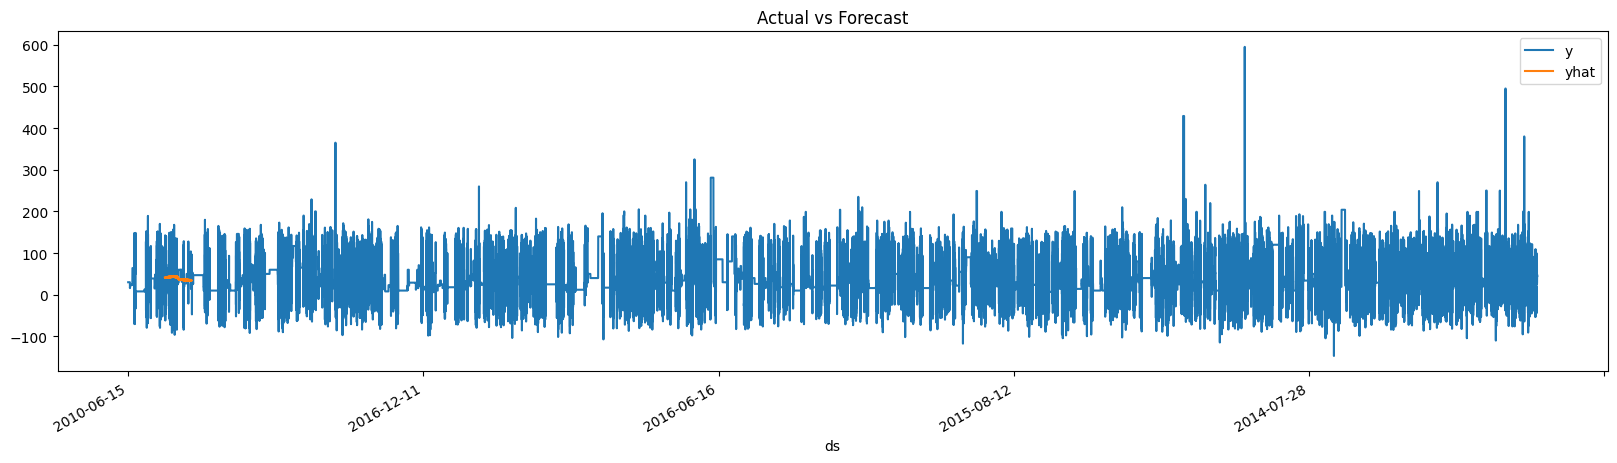

In [138]:
ax = (data1.plot(x='ds',y='y',figsize=(20,5),title='Actual Vs Forecast'))
forecast.plot(x='ds',y='yhat',figsize=(20,5),title='Actual vs Forecast', ax=ax)

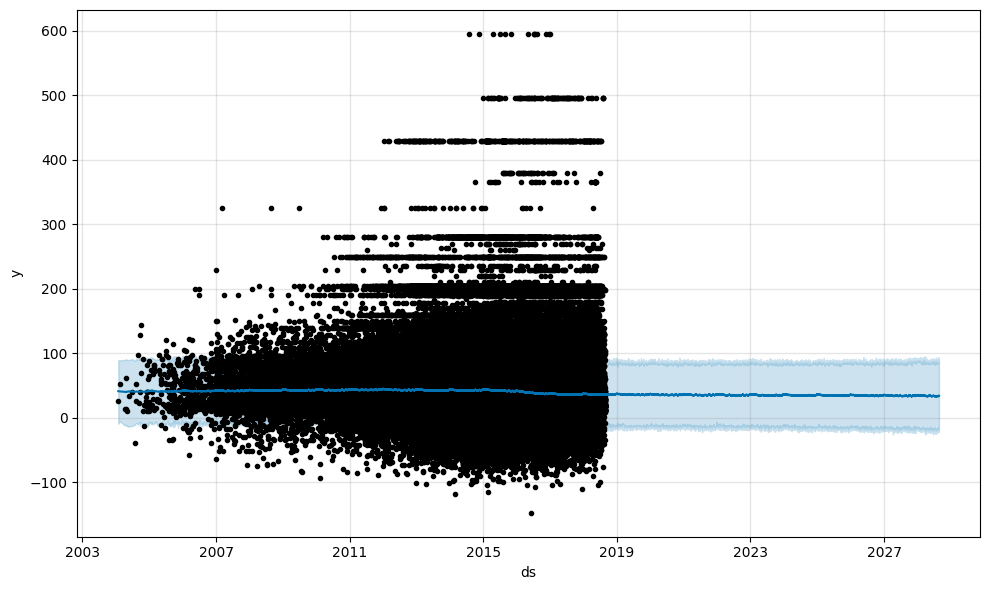

In [139]:
fig1 = model.plot(forecast, uncertainty=True)

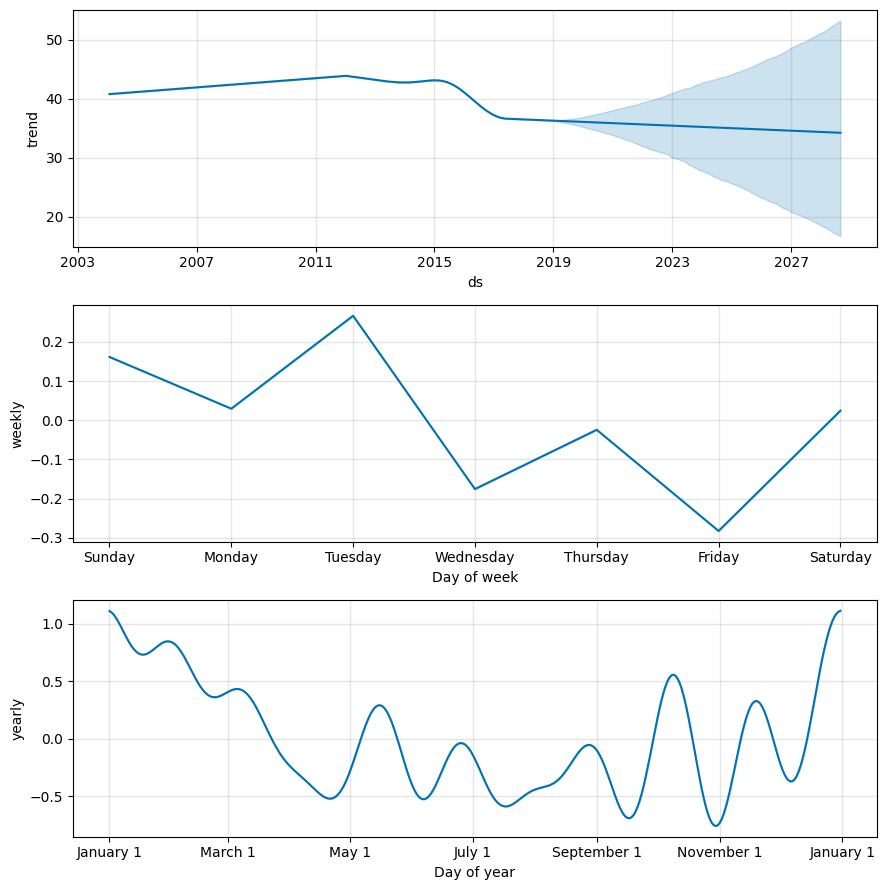

In [140]:
fig2 = model.plot_components(forecast)

# Analysis Completed